# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# Greece
# file_path= './data/NCDC/eleftherios_intl/dat.txt'
# file_path= './data/NCDC/elefsis/dat.txt' # bad dataset
# file_path= './data/NCDC/malaga/dat.txt'
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# Turkey
# file_path= './data/NCDC/turkey/konya/dat.txt' 
# file_path= './data/NCDC/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/turkey/bartin/dat.txt' # bad dataset

# Iran
# file_path= './data/NCDC/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/iran/torbat_heydarieh/dat.txt' # Unusable

# UAE
# file_path= './data/NCDC/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/buraimi/dat.txt' # not good dataset

# file_path= './data/NCDC/uk/marham/dat.txt' 
# file_path= './data/NCDC/uk/tiree/dat.txt'  # try 4
# file_path= './data/NCDC/uk/boscombe_down/dat.txt' # 4?, numpy bug
# file_path= './data/NCDC/uk/middle_wallop/dat.txt' 
# file_path= './data/NCDC/uk/southhamption/dat.txt' # high 0, trend
# file_path= './data/NCDC/uk/bournemouth/dat.txt' # 4?
# file_path= "./data/NCDC/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# file_path, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/landsberg_lech/dat.txt", 4 # very good, can try 4
# file_path= './data/NCDC/europe/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s), mixed report type
# file_path= "./data/NCDC/europe/neuburg/dat.txt"
# file_path= "./data/NCDC/europe/valladolid/dat.txt"
# file_path= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good, trend
# file_path= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/holzdorf/dat.txt" # 2008 year
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= "./data/NCDC/europe/barayas/dat.txt" # numpy problem
# file_path= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked
# file_path= './data/NCDC/europe/nantes/dat.txt' # some dir R square / K-S differs big, unit detect fails

# file_path= './data/NCDC/boston_16nm/dat.txt' # Offshore

file_path= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# file_path= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# file_path= "./data/NCDC/cn/nanjing_lukou/dat.txt" 
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/hefei_luogang/dat.txt" # few 0, trend
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # Stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Good data, Weird KDE shape, might be blocked?
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path= "./data/NCDC/oceania/canberra/dat.txt" # high 0, numpy problem

# file_path = 'TOP/hr_avg.csv' # High 0
# file_path = './data/asos/denver/hr_avg.csv'
# file_path = './data/asos/bismarck_ND/hr_avg.csv' # try 4
# file_path = './data/asos/aberdeen_SD/hr_avg.csv' # only to 2012, good fit, try 2
# file_path = './data/asos/minneapolis/hr_avg.csv'
# file_path = './data/asos/lincoln_NE/hr_avg.csv' 
# file_path = './data/asos/des_moines_IA/hr_avg.csv'
# file_path = './data/asos/springfield_IL/hr_avg.csv' # good fit

# file_path = './data/NDAWN/baker/hr_avg.csv' # 4 might be better
# file_path = './data/NDAWN/dickinson/hr_avg.csv'
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19560820  0000  FM-12  200    5.1         N
1       19560820  0300  FM-12  250    4.1         N
2       19560820  0600  FM-12  250    5.1         N
3       19560820  0900  FM-12  270    6.2         N
4       19560820  1200  FM-12  270    5.1         N
5       19560820  1800  FM-12  290    3.1         N
6       19560820  2100  FM-12  320    3.1         N
7       19560821  0000  FM-12  320    3.1         N
8       19560821  0300  FM-12  290    4.1         N
9       19560821  0600  FM-12  270    5.1         N
10      19560821  0900  FM-12  320    2.1         N
11      19560821  1200  FM-12   90    1.0         N
12      19560821  1800  FM-12  140    2.1         N
13      19560821  2100  FM-12  140    2.1         N
14      19560822  0300  FM-12  140    6.2         N
15      19560822  0600  FM-12  160    4.1         N
16      19560822  1200  FM-12  140    4.1         N
17      19560822  1800  FM-12  200    3.1         N
18      19560822  2100  FM-12  290    7.2         N
19      19560823  0300  FM-12  270    7.2         N
20      19560823  0900  FM-12  320    5.1         N
21      19560823  1200  FM-12  270    1.0         N
22      19560823  2100  FM-12  999    0.0         C
23      19560824  0000  FM-12  999    0.0         C
24      19560824  0300  FM-12  270    1.0         N
25      19560824  0600  FM-12   90    1.0         N
26      19560824  0900  FM-12  160    2.1         N
27      19560824  1200  FM-12  999    0.0         C
28      19560824  1800  FM-12  999    0.0         C
29      19560824  2100  FM-12  140    4.1         N
...          ...   ...    ...  ...    ...       ...
359333  20150301  0900  FM-15  270    4.0         N
359334  20150301  0930  FM-15  260    4.0         V
359335  20150301  1000  FM-15  250    4.0         V
359336  20150301  1030  FM-15  250    3.0         V
359337  20150301  1100  FM-15  260    4.0         N
359338  20150301  1130  FM-15  230    3.0         N
359339  20150301  1200  FM-15  230    2.0         V
359340  20150301  1230  FM-15  270    3.0         N
359341  20150301  1300  FM-15  240    2.0         V
359342  20150301  1330  FM-15  260    2.0         V
359343  20150301  1400  FM-15  250    2.0         V
359344  20150301  1430  FM-15  240    2.0         V
359345  20150301  1500  FM-15  999    0.0         C
359346  20150301  1530  FM-15  999    1.0         V
359347  20150301  1600  FM-15  999    1.0         V
359348  20150301  1630  FM-15  210    1.0         N
359349  20150301  1700  FM-15  999    1.0         V
359350  20150301  1730  FM-15  999    1.0         V
359351  20150301  1800  FM-15  999    1.0         V
359352  20150301  1830  FM-15  180    1.0         N
359353  20150301  1900  FM-15  160    1.0         N
359354  20150301  1930  FM-15  210    1.0         N
359355  20150301  2000  FM-15  230    2.0         N
359356  20150301  2030  FM-15  230    1.0         N
359357  20150301  2100  FM-15  240    2.0         N
359358  20150301  2130  FM-15  180    1.0         N
359359  20150301  2200  FM-15  160    1.0         N
359360  20150301  2230  FM-15  150    1.0         N
359361  20150301  2300  FM-15  190    2.0         N
359362  20150301  2330  FM-15  190    1.0         N

[359363 rows x 6 columns]

In [5]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


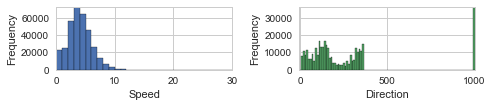

In [6]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [7]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  3.369710e+05  336971.000000  336971.000000  336971.000000   
mean   2.000006e+07    1128.070137     268.228497       3.543890   
std    1.115119e+05     691.735348     275.924866       2.002307   
min    1.973010e+07       0.000000       0.000000       0.000000   
25%    1.991120e+07     530.000000      90.000000       2.000000   
50%    2.002062e+07    1100.000000     200.000000       3.000000   
75%    2.010050e+07    1730.000000     320.000000       5.000000   
max    2.015030e+07    2357.000000     999.000000      30.000000   

               month   dir_windrose  
count  336971.000000  336971.000000  
mean        6.536892     248.807883  
std         3.448796     279.529540  
min         1.000000       0.000000  
25%         4.000000      90.000000  
50%         7.000000     150.000000  
75%        10.000000     310.000000  
max        12.000000     999.000000

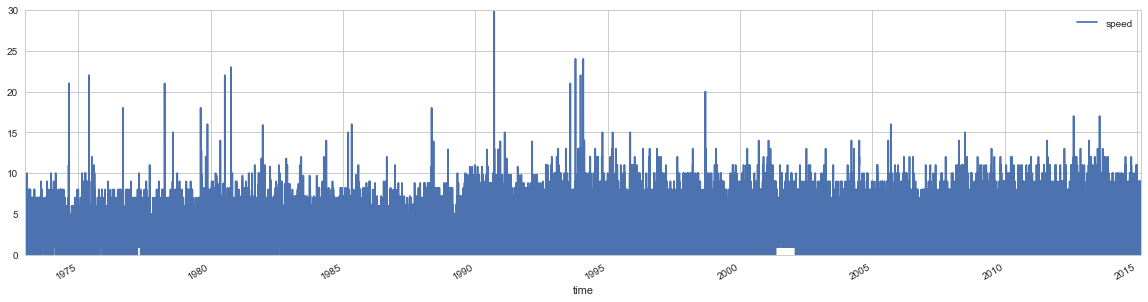

In [8]:
df.plot(y='speed',legend=True,figsize=(20,5))

### 1.2.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False


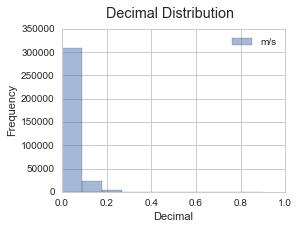

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.2.2 Sampling Type Selection

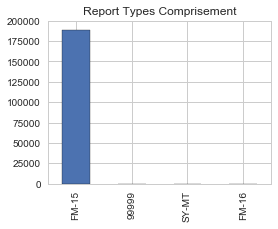

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

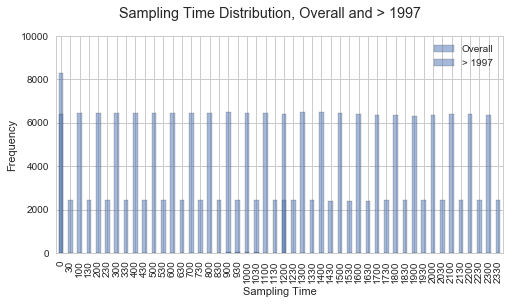

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0, 30]


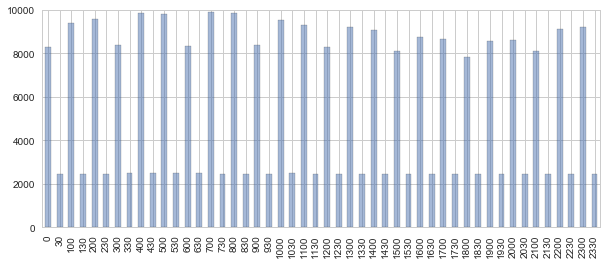

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1994-01-28 00:00:00  19940128     0  FM-15  119    3.0         N      1   
1994-07-18 10:00:00  19940718  1000  FM-15  337    5.0         N      7   
1994-08-05 11:00:00  19940805  1100  FM-15  335    9.0         N      8   
1994-08-10 05:00:00  19940810   500  FM-15  319   10.0         N      8   
1994-09-03 21:00:00  19940903  2100  FM-15  331    5.0         N      9   
1994-12-03 14:00:00  19941203  1400  FM-15  316    3.0         N     12   
1995-04-03 13:00:00  19950403  1300  FM-15  337    3.0         N      4   
1998-06-03 11:00:00  19980603  1100  FM-15   59   10.0         N      6   
1998-09-09 12:00:00  19980909  1200  FM-15  359   20.0         N      9   

                     dir_windrose  
time                               
1994-01-28 00:00:00           331  
1994-07-18 10:00:00           113  
1994-08-05 11:00:00           115  
1994-08-10 05:00:00           131  
1994-09-03 21:00:00           119  
1994-12-03 14:00:00           134  
1995-04-03 13:00:00           113  
1998-06-03 11:00:00            31  
1998-09-09 12:00:00            91

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1993-12-21 22:00:00  19931221  2200  FM-15  110   22.0         N     12   
1993-08-02 14:00:00  19930802  1400  FM-15  140   21.0         N      8   
2013-08-01 07:30:00  20130801   730  FM-15  170   17.0         N      8   
2012-08-08 05:30:00  20120808   530  FM-15    0   17.0         N      8   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N      4   
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N      9   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N     12   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N     10   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N      8   
2012-08-08 03:30:00  20120808   330  FM-15   10   15.0         N      8   

                     dir_windrose  incre  incre_reverse  
time                                                     
1993-12-21 22:00:00           340   19.0           20.0  
1993-08-02 14:00:00           310   17.0           21.0  
2013-08-01 07:30:00           280   12.0            7.0  
2012-08-08 05:30:00            90    2.0            4.0  
1985-04-30 08:00:00           140    9.8            9.8  
2005-09-11 17:00:00            90    4.0            4.0  
1981-12-19 07:00:00           310   13.9            3.1  
1994-10-20 08:00:00           310    6.0            8.0  
2012-08-08 05:00:00            80    1.0           -2.0  
2012-08-08 03:30:00            80    2.0            0.0

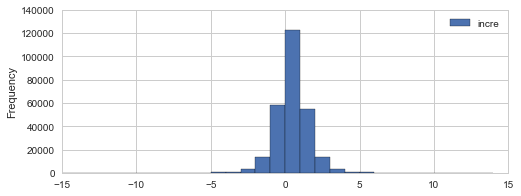

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 4


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
2013-08-01 07:30:00  20130801   730  FM-15  170   17.0         N      8   
2012-08-08 05:30:00  20120808   530  FM-15    0   17.0         N      8   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N      4   
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N      9   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N     12   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N      8   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N      8   
2012-08-08 02:30:00  20120808   230  FM-15   10   15.0         N      8   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N     10   
2012-08-08 03:30:00  20120808   330  FM-15   10   15.0         N      8   

                     dir_windrose  incre  incre_reverse  
time                                                     
2013-08-01 07:30:00           280   12.0            7.0  
2012-08-08 05:30:00            90    2.0            4.0  
1985-04-30 08:00:00           140    9.8            9.8  
2005-09-11 17:00:00            90    4.0            4.0  
1981-12-19 07:00:00           310   13.9            3.1  
2012-08-08 05:00:00            80    1.0           -2.0  
2012-08-08 04:00:00            90    0.0            1.0  
2012-08-08 02:30:00            80    1.0            2.0  
1994-10-20 08:00:00           310    6.0            8.0  
2012-08-08 03:30:00            80    2.0            0.0

### 1.3.2 0 Speed

In [17]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0386598990298


### 1.3.3 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [18]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       6646
10      4810
20      5215
30      5799
40      6022
50      7703
60      8228
70      7032
80      7825
90     11834
100    10494
110     8819
120     9918
130     8737
140     5394
150     4686
160     4245
170     3374
180     2864
190     2063
200     2145
210     2574
220     2430
230     2399
240     2616
250     2844
260     3795
270     5435
280     6328
290     8989
300    14076
310    12280
320    12851
330    12939
340    10251
350     8242
999    31349
Name: dir, dtype: int64

36 10.0


In [19]:
df.query('dir == 999')['speed'].value_counts()

0.0    17615
2.0     6880
1.0     6356
3.0      389
4.0       63
5.0       20
3.1        8
6.0        6
4.1        4
2.1        3
7.0        2
5.1        2
8.0        1
Name: speed, dtype: int64

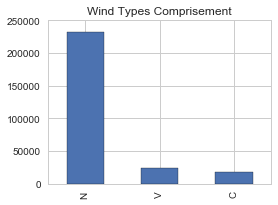

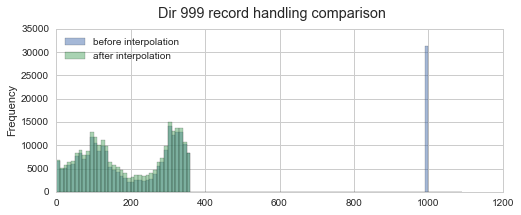

In [20]:
df=realign_direction(df, effective_column)
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.4 Time Shift Comparison

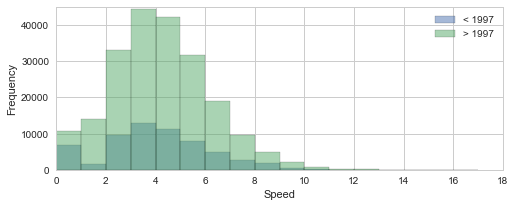

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

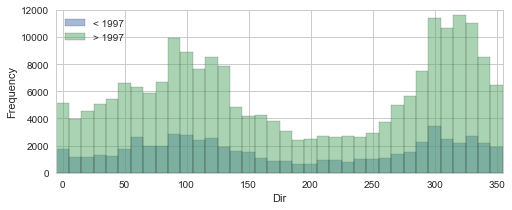

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


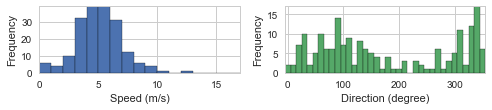

1980 - 1984


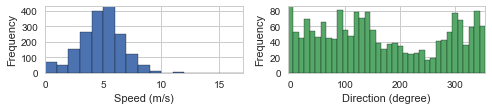

1985 - 1989


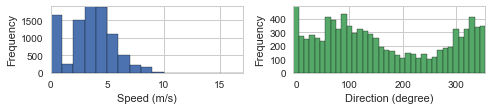

1990 - 1994


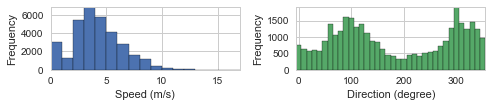

1995 - 1999


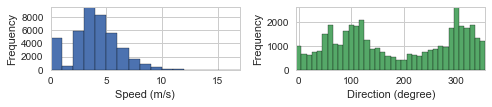

2000 - 2004


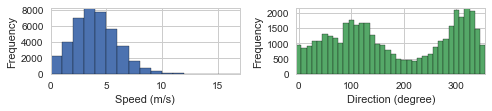

2005 - 2009


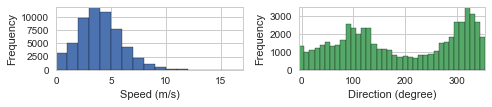

2010 - 2014


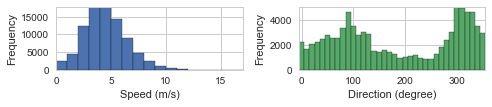

2015 - 2015


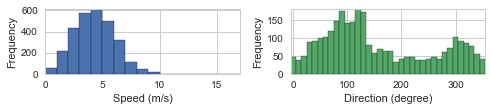

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 6.0)

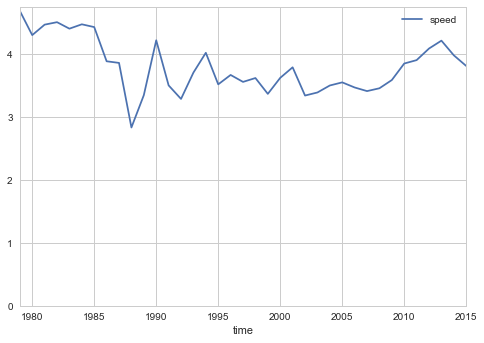

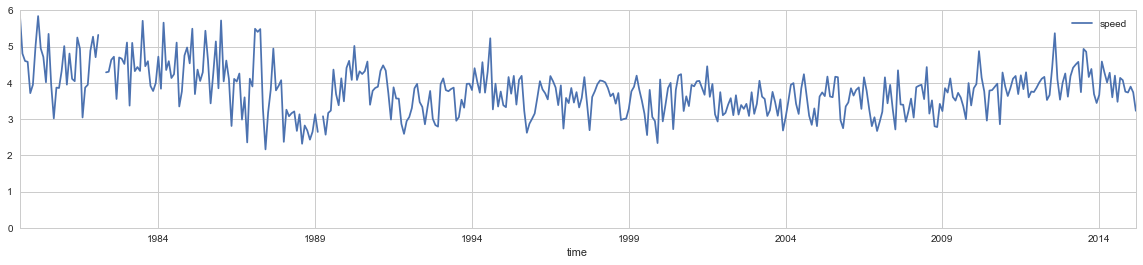

In [24]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [25]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADQpJREFUeJzt3XtsFPUWB/DvdrfdbXdpK7ReVGillYqAXKy91kSESNKI
RooGlWJjTYAETXxFKyoGqLCxjfKHsakkJv1DKwmSam4CxqBEDMQHlqbVPiwkiF3a0gLd9/sxv/tH
LyvFnZltpzuP7fkkJLJnOnOycjqzs2d+R8cYYyCETEuG0gkQomVUQIRIQAVEiARUQIRIQAVEiARU
QIRIQAWkAowxbNu2DZ9//nn8NafTifr6elRWVmLVqlX46KOPwHFc0nGhfZOZQwWksFgshoaGBpw6
dWrS6y+99BIGBgZw4MABtLS04LvvvsP+/fuTjgvtm8wgRhRjs9lYTU0Ne+ihh1hFRQVra2tjjDHW
29vLysrKWF9fX3zbrq4utmzZMubz+UTjQvsmM4vOQArq6upCSUkJvvrqK8yZMyf+us1mg8lkwtKl
S+OvLVmyBJFIBL29vaJxoX2TmWVQOoHZrLq6GtXV1f94vbCwEMFgEHa7HXPnzgUADA8PAwDsdrto
XGjfZGbRGUiFVqxYgeLiYuzZswculwsOhwNNTU0wGAyIRCKicSIfKiAVysrKQnNzM/78809UVlZi
7dq1uP/++5GXlweLxSIaJ/KhSziVuvPOO/H1119jfHwcFosFsVgM77//PhYuXJhUnMiDzkAq5HK5
8Mwzz2B4eBjz5s2D0WjEiRMnUFhYiNLSUtE4kQ8VkArl5eUhFAqhsbERf/31F06dOoW9e/fixRdf
hE6nE40T+ch+CdfZ2Sn3ITUhFArBZrPF359t27ahtbUV1dXVyM3NxeOPP47FixcnHRfaNxF27733
Jr2tjjF5n0jt7OycUoJKoTxnVrrmSZdwhEhABUSIBFRAhEhABUSIBFRAhEhABUSIBFRAhEhABUSI
BGnXTMpxHBwOh+h2N910EzIy6PcHkSbtCsjhcODg6S9hzuVv6/e5vait3Ih58+bJmBlJR2lXQABg
zrVgTn6u0mmQWSDtCogxhkg4gkg4zLtNJByBzC2AJE2JFhDHcWhoaMDZs2eRlZUFq9WK4uLiePzo
0aP49NNPodfrUVZWhoaGBkU/W/j9fgyPuZAb4c/BbXfB7/fLmBVJV6L/0o8fP45wOIwvvvgCr7/+
OpqamuKxYDCIDz/8EJ999hkOHToEr9eLEydOpDThZOgNBhgyM3n/6A1pd+IlChEtoM7OTjz44IMA
gJUrV8aXTQImnt0/dOgQsrOzAQDRaBRGozFFqRKiPqK/ir1e76SFKvR6PaLRKAwGAzIyMlBQUAAA
aGtrg9/vxwMPPCB60FQ+2DU6Ogqny4mYwIOZHqcTHR0dsNlsvNuYTCbNPIBGeSpHtIAsFgt8Pl/8
7xzHwXDdJRDHcfjggw9w4cIFNDc3J/VIcSofrLLZbOjwDyLv/+ulJcIiUQR0+YgZb00YDwb9QNCJ
VatWpSrNGZOuD6opZapFLnoJV15ejpMnTwIAuru7UVZWNim+e/duhEIhfPzxx/FLOS0wGrORnZOT
8I/JlKN0ekQjRM9AVVVV+PHHH1FTUwPGGN577z0cOXIEfr8fy5cvR3t7OyoqKvDcc88BAOrq6lBV
VZXyxAlRA9ECysjIwN69eye9dv3SSQMDAzOfFSEaQc1ghEhABUSIBJr7RlGs29rhcIC6dIhcNFdA
Yt3WwxcuIoxMwX0wjoPH7YLLaU8YD/gDyDf+c1wiITfSXAEBwt3WORYLAt6Q4M8HfAF0R37FiGko
YdzjdGH1zXdJzpOkP00W0EwwWXJgzks8uS0apRk7JDl0E4EQCaiACJFAc5dwYg/MRWN0+UXko7kC
EntgbvSyG1lm7fTkEW3TXAEBfz8wl0iGQfgWNiEziT4DESKBJs9AqcYw8bj69c9B3SgnJ4fGKRIq
oERi0SjOXfaioH8sYTwY9GNV+SKYzWaZMyNqQwXEIyszC9k59GAdEUafgQiRgAqIEAmogAiRgAqI
EAmogAiRQJG7cOPj44JxpWf3MI6Dz+sRfOCO4wplzoqokSIF9N8/jvHG1DC7J+ALYIQbQsblxF+U
epwurHQUYs6cxM8TkdlDkQLSwuweozmbHrgjougzECESUAERIoFoAXEch927d2PTpk149tlnMTg4
+I9tAoEAampqcP78+ZQkSYhaSRqwBQA9PT2ora3FxYsXU5YkIWolehNBaMAWAITDYbS0tGDHjh1J
H/TSyAhvzOf2ojvUjfz8/IRxsfk/brcLBmMmjPbEt6CT2eZa3M4T97ic6OnpwZUrV3iPISetzN3R
Sp5TIWnAFjC9WT+33Jp4Lg8AeHLcWHnXSt7b2GLzf3x2FwxGA+YKzAcS28Znd8Ef8vPG9Qy4++67
UVRUxHsMuWhp7o5W8pwK0Us4sQFbhMxmkgdszUYME4ub+Hw+wT+MFulOe5IGbG3atEmOHFUnGg7j
xOl+3HaR/5HvUCiAdWv+Td0KaU7ygK1r2traZi4rlQv4Avgj0oNxL39Pn8fpQqWjiAoozdGHmWkS
WlsboHaf2YI6EQiRgAqIEAmogAiRgAqIEAkUuYnAN1lhIhah70+IZihSQCNX+L8/cdtd8Pv9MmZD
yPQpUkB8kxUAIMNgiH/Ln4jf7wedn4haqO57oFg0ijP9wxjzZCWM2wYvgovFZM6KkMRUV0AAYDRm
865LbTRmA1GZEyKEB92FI0QCVZ6B0sH1Hdt8aMaQ9qmugBjHweN28S5q6HG7wDLUfxtB7LMczRhK
D6oroIAvgO7IrxgxDSWMj1y2wTJX/evKAcKf5Uh6UF0BAcKdziazNv5Bip1JaXng9KDKAkoHYmdS
t92B4psNWLBggeB+lF4nnAijAkohoTOp2+HA0YHjmO+5hffn1bBOOBFGBaSgnDlmTawTTvhRASmE
AYhEotRYq3FUQAqJRWMYHfdAZ6LGWi2jAlKQQW8QbKzV0/p7qke3dwiRgAqIEAnoGkHFkumno5sM
yhItII7j0NDQgLNnzyIrKwtWqxXFxcXx+Pfff4+WlhYYDAZs3LgRTz/9dEoTnk3E+ukCAR/0IQc1
rCpItICunw/U3d2NpqYmHDhwAAAQiUTQ2NiI9vZ2ZGdnY/PmzVi7di0KCgpSnvhswDgO4VAY4XAw
YdztcmFk1IWs/LGE8UDAh/Il/xJtWKUimz5J84HOnz+PoqIi5OXlAZgYddLR0YFHHnlEcJ+ucf7Z
PT63G3qjgXcbqfFk9xEIB1N+DLF9XL00hkvRIRT4b04YdzudKAzdBpfTkTDuctlxZMgGi4X/y9pw
JIj/LFuInBQ3vY6OjsJms03759UwSiYRSfOBvF7vpLWfzWYzvF6v6EHXl1TyB4ViMxHXyjGS3UbA
bQIzkv6WE58mkUrz58+XNJBMLcPMbiRaQELzgW6M+Xw+0cXUtTBkiZBkSZoPVFpaisHBQTidToTD
YZw5cwb33HNP6rIlRGV0TOQ+6LW7cOfOnYvPB+rv74/PB7p2F44xho0bN6K2tlau3AlRnGgBEUL4
UScCIRJQAREiARUQIRLI1gsn1hKkJk888UT8u68FCxagsbFR4Yz+9ttvv2H//v1oa2vD4OAg3nrr
Leh0OixevBh79uxRzfoJ1+fZ39+P7du34/bbbwcAbN68GY8++qii+UUiEezcuRPDw8MIh8N44YUX
cMcdd0z9/WQyOXbsGHvzzTcZY4x1dXWx559/Xq5DT0kwGGQbNmxQOo2EPvnkE/bYY4+xp556ijHG
2Pbt29kvv/zCGGNs165d7Ntvv1Uyvbgb8zx8+DBrbW1VOKvJ2tvbmdVqZYwx5nA42Jo1a6b1fsr2
60qoJUhNBgY

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFBRJREFUeJztnXtsU+X/x99rSy9rd+EyEb4wvr9NUFCJXAT+UIiLiCGA
xiEDzIwRDMTIJSgZEwYLDAGviUiIEI3JwABBfhp+yA8RCCB8QRgXufMDZHODXdr13q638/z+6HbW
nnXtNtqe0/bzSpa05+lzzuec7t3n8vk8nyeNMcZAEERckYltAEGkIiQ8ghABEh5BiAAJjyBEgIRH
ECJAwiMIESDhJRiMMcyfPx87duzgj5lMJnz00UcYP348XnjhBXz99dfgOK7L5eHOTcQGEl4C4fP5
UF5ejpMnTwYdX7RoEW7evImtW7diy5YtOHz4MD7//PMul4c7NxEjGJEQ1NTUsNmzZ7OXXnqJjR07
llVWVjLGGLt69SobNmwYu3btGv/ZixcvsqeffprZ7faI5eHOTcQOavEShIsXLyIvLw/79u1DRkYG
f7ympgZqtRojRozgjz311FPweDy4evVqxPJw5yZih0JsA4iuMWPGDMyYMaPD8ZycHLS0tKC5uRl9
+vQBANTV1QEAmpubI5aHOzcRO6jFS3BGjhyJIUOGYM2aNTCbzTAajdi4cSMUCgU8Hk/EckIcSHgJ
jlKpxObNm3Hv3j2MHz8eBQUFmDBhArKysqDT6SKWE+JAXc0k4Mknn8SBAwdgMBig0+ng8/nw6aef
YvDgwV0qJ+IPtXgJjtlsxty5c1FXV4e+fftCpVLh2LFjyMnJQX5+fsRyQhxIeAlOVlYWXC4XNmzY
gPv37+PkyZNYu3YtPvjgA6SlpUUsJ8RB0l3NqqoqsU2QJC6XCzU1NfzzmT9/Pr777jvMmDEDmZmZ
eP311zF06NAul4c7NxGeMWPG9KheGmPSXYFeVVXV4xuLJ2RndEkFO6mrSRAiQMIjCBGIOMbjOA7l
5eW4desWlEolKioqMGTIEL786NGj2LJlCxQKBQoLCzFr1qxO6xgMBqxatQoWi4Wf0s7NzY3pDRKE
FIkovN9//x1utxu7d+/GpUuXsHHjRmzduhUA4PF4sGHDBuzduxcajQZz5sxBQUEBLly4ELLOZ599
hunTp2Pq1Kk4c+YM7t27R8IjUpKIXc2qqiq8+OKLAIDnnnuOD6wFgLt37yI3NxdZWVlQKpUYM2YM
zp0712mdCxcuoKGhAe+88w7279+PcePGxeKeCELyRGzxbDZbUGiRXC6H1+uFQqGAzWYLimbXarWw
2Wyd1qmrq0NmZiZ++OEHfPPNN9i+fTuWLFkS9vqJMq1NdkaXRLGzp0QUnk6ng91u599zHAeFQhGy
zG63IyMjo9M62dnZKCgoAAAUFBTgq6++imhgsk8rxxOyM7o8yo9DxK7m6NGjceLECQDApUuXMGzY
ML4sPz8f1dXVMJlMcLvdOH/+PEaNGtVpnTFjxuD48eMAgHPnzuGJJ57oseEEkchEbPEmT56MU6dO
Yfbs2WCM4ZNPPsH+/fvhcDhQVFSEFStWYN68eWCMobCwEP379w9ZBwBKSkqwatUq7Nq1CzqdDl98
8UXMb5AgpAhFrkQBsjO6pIKd5EAnCBGQdJC0FOE4DkajscMxIjowxuB0OoMm59LT05NuJQUJr5sY
jUbsPPsTtJl+d4ndYsPTKlrXFi0cDgeu3jPCp2oAALS0OPDC6P+CVqsV2bLoQsLrAdpMHTKyMwH4
Wzuz3gyDwcCX9+7dGzIZ9eJ7ilKlhiY9XWwzYgoJ7xFxWO243XQLxhstAPwt4FvjC9G3b1+RLSOk
DAkvCmi06XwLSBBdgYRHJBSMMTgcjg7HAARNwEh9QoaEF2U4juMTxQZC477o4HA48MeFv6FWt48B
TUY90mRyZGX1BpAYEzIkvCjjsNrx300H0bd/P/4Yjfuii1qdHjT54nSmI00mS6gJGRJeDNBmaoPG
fKFaQWoBuwZjrEMgvoSDrbpMygsvlEM8nCgYY/C4PfC43QAAj9uLSP8GwlaQWsCu09LixJm/THw3
0mTUQ52uQ7qEu5FdIeWFF8ohHk4UDocDdQ1mZHr8wqxvskCt8ka8jrAVJLqOSq3hu5FOZ+J0J8OR
8sIDgh3iXUGuUEDRq1frazmAyMIjiEBIeETCw3Ec7FYLZK3eA6fDCY7LEdeoCJDwiITHZrXgz4Y/
kO32Dw+sJjOeM+ZIepNNEh4hKTiOg81qgdnknwW2mE3IyMqOWE+j00Kb5Rea1yv9ff9IeI8IA+D1
eoNmOeVKeqw9xWg04rr9IiyNfuEZ9XpMkE1C3779ItRMLCI6kjiOw+rVq1FUVITi4mJUV1cHlR89
ehSFhYUoKirCnj17ulRn//79KCoqiuJtiIfP60OzzYMHTXY8aLLjYZOFdlp9RNTadGizMqDNyoBG
l9hug86Ia0JbALh+/Tr27t2bFE7QNuQyuWCWUwBjcHsCfX+epLp/ovvENaGt0WjEl19+iY8//jgW
9xITOI6DwWDg/4xGI7qrGY/Hh4dNFr5VrGswdwj0JVKLuCW0dbvdWLlyJUpLS6FSqbpsYKwTm5pM
JjQY62Fz2AAAVpMFxxuPIysrC4B/x9Uq8zVoM/xdnobaeniUGnCtP1kWixkKVS8+JMxssaCX3AWZ
ov03rUnfCJsHUFmt/mvYbbhy5Qqamppiem+hkHqi2Pr6egBof55mE2qM1fB4/ek1zKZmyGRyGAzt
IXh1tfdhVpiA1t6G1WTCuXPnUFNTw39GrVZLarVC3BLa3rx5E9XV1SgvL4fL5cKdO3ewfv16rFy5
Muz1Y51tymAw4P6NhnYHuofhTkst+qr8C1sb3fUYOGggcgb0BwAo5SoYbC706dMHAGBvNsPhcvDv
XRYb+uVkYsDAgfw1PHYPZAF1ZD4OgwYNwqBBg/jPxCN2MxGyd9XU1ODww8v8s2IeL3Izh2DIv/MA
AM0GPdJkMvTu3Yevo5ABFrsxqI4zLRs+lf87aGlxYNTw6K9WeJQfsYjCGz16NI4dO4apU6eGTWib
np6O8+fPY968eUhLS+tQZ+TIkThw4AAAoLa2FsuWLYsoOrEIDO+yma1RP7/T7sD/3Pwdj1sHAKDY
zVigUmkkvVohrgltUwEGwONpdy8AgNfXcZYzPYNiN1OZiMKTyWRYu3Zt0LH8/PasWgUFBfx+COHq
BDJo0CDe9ZBs+Lw+1BusSFO3d7XrGy1QajX8e6E4U3mWU7iivMPqco6D1WLutkNd6pCnNwYo5O1B
1AAgU/QKKheK09KcurOcwhXlNdX/gPP5+HKn3YlLnj/xQF0LIHkc6iQ8kQgUp1yR2l9D4IpylUrT
sVyXzoeDOR32oBYQAKwWM5gssXoMqf2NEwmHsAUEgAeNNdD1aR8vC7unUlytkPLCC7WinGItpU1g
Cwj4Q8wCEYpTiqsVUv4/LNSK8kGqgLAvQbhXqBlKQnoEitPjdsFoNAb58cTOeZPywgNCrShvx+Px
odFih1fu/9KEM5SE9JGi3zSlhBcqGarD4YiYrEguaxemcIaSkD4MQC+1Cup0NQBpuG9SSnihkqEK
p6/FgLVmOmvrCrVt+xXYFRK7axQrOI6D2WSE2+0P0bNazFEXhRTdNyklPKBjMlSVShOUq0jo3I7H
mE7YFWqsrYe8lyIl0gEajUacqj2GjGx/UPqDxhpwMfivlJr7RnwLJIbw1zFeY7rAEDKb2QqFUpGU
IWXCPKZGo5Ff+Ar4ZygdruQPJiDhhSDw15HGdNFFmMe07u9/4EbqPWMSHhFXGGNQBkx0KDUqOJ2p
t5W15IUXuK4PkP72S0Q7odLj19XVobbehKw2v2mKumckL7zz1xv4193dfknoPrBarTCZmvkZNCAx
4/wSBWG3EvB

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGpBJREFUeJzt3X9s1dX9x/Hn7aUt5f4Au8zEDOsochOIKYXbYRYvVcxc
NZmTEbxyr6kxipMGcO1sdwEptdGKzb7tZjWdv1hMbmm7Tsz8tUwnY62l2JjriqHQkXWsRVGE4uTe
K7Rw+/n+YbyzstF+yu1tkdfjL3p6Tt/ntPTVz++PxTAMAxERGbOUyZ6AiMjFRsEpImKSglNExCQF
p4iISQpOERGTFJwiIiZNG0unZ555hr/85S+cOXMGn8/HkiVL2LBhAxaLhXnz5lFRUUFKSgotLS00
Nzczbdo0ioqKWLZsGadPn6asrIyBgQFsNhvV1dVkZmbS1dVFVVUVVqsVj8fDunXrJnqtIiKJYYzi
nXfeMe6//34jFosZkUjEqKurM+6//37jnXfeMQzDMMrLy40333zT+OSTT4wf/ehHxuDgoHHy5Mn4
v3/7298adXV1hmEYxmuvvWY88sgjhmEYxo9//GOjr6/PGB4eNlavXm10d3ePNhURkSlh1F319vZ2
XC4Xa9euZc2aNdxwww10d3ezZMkSAPLz8+no6OD9999n0aJFpKWl4XA4yMrKoqenh1AoxNKlS+N9
9+zZQyQSYWhoiKysLCwWCx6Ph46Ojon9CyEikiCj7qp/+umnHDlyhKeffpoPPviAoqIiDMPAYrEA
YLPZCIfDRCIRHA5HfJzNZiMSiYxo/2pfu90+ou/hw4fPO49QKDSuBYqIjMbtdpvqP2pwzpo1i+zs
bNLS0sjOziY9PZ2PP/44/vloNIrT6cRutxONRke0OxyOEe3n6+t0OhO+uEQJhUKqrdqq/Q2ubdao
u+put5u3334bwzA4evQop06d4vvf/z6dnZ0AtLW1kZeXR05ODqFQiMHBQcLhML29vbhcLhYvXkxr
a2u8r9vtxm63k5qaSn9/P4Zh0N7eTl5enunJi4hMhlG3OJctW8a7777LypUrMQyDLVu2MHv2bMrL
y6mtrSU7O5uCggKsViuFhYX4/X4Mw6CkpIT09HR8Ph+BQACfz0dqaio1NTUAVFZWUlpaSiwWw+Px
sHDhwglfrIhIIozpcqRf/OIX57Q1NDSc0+b1evF6vSPaMjIyqKurO6dvbm4uLS0tY52niMiUoQvg
RURMUnCKiJg0pl11Gb9YLEZvb+8FjReRqUXBOcF6e3sp3NjIjJmXmx77+WefELgzJ36zgYhMDQrO
JJgx83Lsl31nsqchIgmiY5wiIiYpOEVETFJwioiYpOAUETFJwSkiYpKCU0TEJAWniIhJuo5zCjOG
hzly5AgHDx4c99eYO3cuVqs1gbMSEQXnFHYqfIzgLgs73ntrXOM//+wTglv9uFyuBM9M5NKm4Jzi
dNeRyNSjY5wiIiYpOEVETFJwioiYpOAUETFpTCeHfvKTn8Tfgz579mzWrFnDhg0bsFgszJs3j4qK
ClJSUmhpaaG5uZlp06ZRVFTEsmXLOH36NGVlZQwMDGCz2aiuriYzM5Ouri6qqqqwWq14PB7WrVs3
oQsVEUmUUYNzcHAQwzAIBoPxtjVr1lBcXMy1117Lli1b2LlzJ7m5uQSDQXbs2MHg4CB+v5/rrruO
pqYmXC4X69ev5/XXX6e+vp7NmzdTUVHBk08+yZVXXslPf/pT9u/fz4IFCyZ0sSIiiTDqrnpPTw+n
Tp3innvu4a677qKrq4vu7u74U8nz8/Pp6Ojg/fffZ9GiRaSlpeFwOMjKyqKnp4dQKMTSpUvjfffs
2UMkEmFoaIisrCwsFgsej4eOjo6JXamISIKMusU5ffp07r33Xm6//Xb+9a9/cd9992EYBhaLBQCb
zUY4HCYSieBwOOLjbDYbkUhkRPtX+3656/9l++HDh0edbCgUMr3ARBlv7b6+vgTPxJx9+/YRDofH
Pf5i/J6rtmpPtFGDc86cOVx11VVYLBbmzJnDrFmz6O7ujn8+Go3idDqx2+1Eo9ER7Q6HY0T7+fo6
nc5RJ+t2u00tLlFCodC4azscDnjt4wTPaOyuueaacd85dCHrvlCqrdrJrG3WqLvqL774Io8//jgA
R48eJRKJcN1119HZ2QlAW1sbeXl55OTkEAqFGBwcJBwO09vbi8vlYvHixbS2tsb7ut1u7HY7qamp
9Pf3YxgG7e3t5OXlmZ68iMhkGHWLc+XKlWzcuBGfz4fFYuGxxx7jsssuo7y8nNraWrKzsykoKMBq
tVJYWIjf78cwDEpKSkhPT8fn8xEIBPD5fKSmplJTUwNAZWUlpaWlxGIxPB4PCxcunPDFiogkwqjB
mZaWFg+7r2poaDinzev14vV6R7RlZGRQV1d3Tt/c3FxaWlrMzFVEZErQBfAiIiYpOEVETFJwioiY
pOAUETFJwSkiYpKCU0TEJAWniIhJCk4REZMUnCIiJik4RURMUnCKiJik4BQRMUnBKSJikoJTRMSk
Mb3l8lIWi8Xo6+sb8VoQMw4dOpTgGYnIZFNwjqK3t5fq7e8zY+b4Xn8x8MEBvjV7foJnJSKTScE5
BjNmXo79su+Ma+znnx1N8GxEZLLpGKeIiEkKThERkxScIiImjSk4BwYGuP766+nt7aWvrw+fz4ff
76eiooLh4WEAWlpaWLFiBV6vl127dgFw+vRp1q9fj9/v57777uPEiRMAdHV1cfvtt7Nq1Sqeeuqp
CVqaiMjEGDU4z5w5w5YtW5g+fToAW7dupbi4mMbGRgzDYOfOnRw7doxgMEhzczPbtm2jtraWoaEh
mpqacLlcNDY2snz5curr6wGoqKigpqaGpqYm9u7dy/79+yd2lSIiCTTqWfXq6mpWrVrFs88+C0B3
dzdLliwBID8/n927d5OSksKiRYtIS0sjLS2NrKwsenp6CIVCrF69Ot63vr6eSCTC0NAQWVlZAHg8
Hjo6OliwYMGokw2FQuNe6Hj19fUlvWaiGMPDvPnmm+zbt29c42fPnj0p3/MvqbZqT1XnDc6XXnqJ
zMxMli5dGg9OwzCwWCwA2Gw2wuEwkUhkxAXiNpuNSCQyov2rfe12+4i+hw8fHtNk3W63udUlgMPh
gNfGdw3nZDsVPkZwl4UZM80fyv78s08I3AkrVqyYgJmNLhQKTcrPW7UvzdpmnTc4d+zYgcViYc+e
PRw4cIBAIBA/TgkQjUZxOp3Y7Xai0eiIdofDMaL9fH2dTqfpicvYXMg1qCLy3513U2T79u00NDQQ
DAaZP38+1dXV5Ofn09nZCUBbWxt5eXnk5OQQCoUYHBwkHA7T29uLy+Vi8eLFtLa2xvu63W7sdjup
qan09/djGAbt7e3k5eVN/EpFRBLE9J1DgUCA8vJyamtryc7OpqCgAKvVSmFhIX6/H8MwKCkpIT09
HZ/PRyAQwOfzkZqaSk1NDQCVlZWUlpYSi8XweDwsXLgw4QsTEZkoYw7OYDAY/3dDQ8M5n/d6vXi9
3hFtGRkZ1NXVndM3NzeXlpYWM/MUEZkydAG8iIhJCk4REZMUnCIiJik4RURMUnCKiJik4BQRMUnB
KSJikoJTRMQkBaeIiEkKThERkxScIiImKThFRExScIqImKTgFBExScEpImKSglNExCQFp4iISQpO
ERGTFJwiIiaN+s6hWCzG5s2bOXToEBaLhcrKStLT09mwYQMWi4V58+ZRUVFBSkoKLS0tNDc3M23a
NIqKili2bBmnT5+mrKyMgYEBbDYb1dXVZGZm0tXVRVVVFVarFY/Hw7p165KxXhGRCzbqFueuXbsA
aG5upri4mF/96lds3bqV4uJiGhsbMQyDnTt3cuzYMYLBIM3NzWzbto3a2lqGhoZoamrC5XLR2NjI
8uXLqa+vB6C

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFqNJREFUeJzt3X9Q0/f9B/BnAKEaApZt3nlFVvDHXR2XtZVZdxWtvbV0
O62bp07wcJ0/TlnV2VYN8kP0wLVcp3Nt5yzOrjdEaU572/pj187NlVEo82KVE7VeOS8doCLotyYo
CSTv7x8emTEhIW+SfD5Jno877+CTD+aVt/HF55PP+/15aoQQAkREFLA4pQsgIopUbKBERJLYQImI
JLGBEhFJYgMlIpLEBkpEJGlEDfTMmTMoLCwEAPT29qKoqAjLly/HsmXL8NVXXwEAjEYjFi1ahKVL
l+LEiRMAgP7+fmzYsAEFBQVYs2YNrl+/DgA4ffo0lixZgmXLluGNN94IxesiIgo94UdNTY2YP3++
WLJkiRBCCIPBID744AMhhBDNzc3ixIkToru7W8yfP1/YbDZx8+ZN19dvvfWWeO2114QQQrz//vui
srJSCCHEs88+K8xms3A6nWL16tWira3NXxlERKrj9wg0IyMDr7/+uuv7U6dO4erVq3juuefw3nvv
YebMmWhtbcUjjzyCxMRE6HQ6ZGRk4MKFCzCZTMjNzQUAzJkzB83NzbBarbDb7cjIyIBGo8Hs2bPR
1NQUut8QREQhkuBvh7y8PHR0dLi+7+zsREpKCt5++2288cYbOHDgAB588EHodDrXPlqtFlarFVar
1bVdq9XCYrHAarUiOTnZbd///ve/fgs1mUwBvTAiopGaMWOG1M/5baD3Gj9+PJ588kkAwJNPPonf
/OY3yM7ORl9fn2ufvr4+6HQ6JCcnu7b39fUhJSXFbdvd20dC9kUGm8lkYi1esBbvWIt66wBGd3AW
8FX4GTNm4JNPPgEAnDx5ElOmTIFer4fJZILNZoPFYkF7ezumTZuGRx991LVvQ0MDZsyYgeTkZIwZ
MwZfffUVhBBobGxETk6O9AsgIlJKwEegBoMBZWVlqK+vR3JyMnbv3o3U1FQUFhaioKAAQgi88MIL
SEpKQn5+PgwGA/Lz8zFmzBjs3r0bALBz505s3rwZDocDs2fPxne/+92gvzAiolAbUQNNT0+H0WgE
ADzwwAP44x//6LHP0qVLsXTpUrdtY8eOxWuvveax78MPP+z6+4iIIhUn0hMRSWIDJSKSxAZKRCSJ
DZSISBIbKBGRpICnMRFRZHI4HDCbzW6rBu82efJkxMfHh7mqyMYGShQj2tvbUV3XinGpVzweu/V1
N2pfLsC0adMUqCxysYESxZBxqROQfP8DSpcRNfgZKBGRJDZQIiJJbKBERJLYQImIJLGBEhFJCjhU
bsh7772Hn/70p67vGSpHRLHGbwM9cOAAysrKYLPZXNvOnTuHo0ePQggBALh27Rpqa2tRX1+PgwcP
Ys+ePbDb7Thy5AimTZuGw4cP48c//jH27dsHAKioqMDu3btx5MgRnDlzBufOnQvRyyMiCh2/80CH
QuW2bt0KALhx4wb27NmDkpISlJeXA4BbqFxiYqJbqNzq1asB3AmV27dvn1uoHABXqNz06dP9Fqum
XCTW4h1r8U4NtZjNZp+Pnz17FhaLJUzVqGNMRiugUDmHw4HS0lJs27YNSUlJrn3uDo8DQhMqBzAT
yRvW4h1r8aTT6YD3PVchDcnOzva6EsnhcKC9vX3Yn5NZAqqWMQFG18gDWonU1tYGs9mMHTt2wGaz
4csvv8SuXbswa9assITKEVH4tbe3o3DbYYxLneDxWN//XUHl2seRmZnp8VgsrK0PqIHq9Xp88MEH
AICOjg68+OKLKC0txbVr17B3717YbDbY7XaPUDm9Xu81VG7SpElobGzE+vXrQ/LiiCg4hlsCeuvr
q9he04xxqe33bI+NtfVBWQv/rW99i6FyRDEqltfXBxwqN9w2hsoRUazhRHoiIklsoEREkng/UCKC
cDpx6dIlr48Nt53YQIkIwG3LNWyv6fG4mg4AvR3n8Y30hxSoSv3YQIkIgO+pSuQdG6jK+VsF4nA4
wlgNEd2NDVTlfK0CufV1NwzL9Zg5c6YClRERG2gEiOWJykRqxmlMRESS2ECJiCSxgRIRSWIDJSKS
FHAm0vnz51FQUIDCwkKsWrUKPT09AJiJRESxJ+BMpF27dqG8vBy1tbV46qmncODAAWYiEVFMCjgT
ac+ePZgw4c6cRIfDgaSkJGYihZC/HBsgNsdlJFiLu5G8l4LJX8aSGsZktALKRALgap6nTp3CoUOH
UFdXh3//+9/MRAoRfzk2QGyOiz+sxdNI3kvBNFzGEqCeMQHCmIk05MMPP8Tvf/971NTUIC0tzWvO
ETORiCjaBXwV/i9/+QsOHTqE2tpaTJo0CcCdrCSTyQSbzQaLxeKRiQTAayaSEAKNjY3IyckJ7quK
EcLpRFdXFy5evOj1D9fJE4VWQEegDocDu3btwsSJE7FhwwYAwPe+9z1s3LiRmUgKuG25htoTGhw7
ddzjsVgJ9SJSUsCZSP/5z3+87sNMJGVwnTyRcjiRnohIEhsoEZEkNlAiIkm8H2gM8neX+8mTJyM+
Pj6MFRFFJjbQGOTvLve8ek80MmygMYpX74lGjw2UiILOV848ED1hiGygRBR0vnLmoykMkQ2UiEIi
Fj4m4jQmIiJJbKBERJLYQImIJAWciWQ2m5Gfn4+CggJUVFTA6XQCYCYSEcWegDORXn75ZWzatAmH
Dx+GEAL/+Mc/mIlERDHJbwMdykQa0tbW5pp+MGfOHDQ1NbllIul0OrdMpNzcXNe+zc3NbplIGo3G
lYlEwTU0D8/bjZZ9zc8jopELOBNJCAGNRgPAPecoHJlIagqhUlOonDe+5uH1dpzHN9IfGvZn/YWB
+RKL/0YjoYZawh0q548axmS0Ap4HGhf3v4NWXzlHochEUlMIlZpC5YYz3Dy8W19fHfZnhNMJrVbr
9gvxbr5uNKK2oLBYrMXXjWK0Wm1YahgpNf37yAq4gU6fPh0tLS147LHH0NDQgFmzZkGv12Pv3r2w
2Wyw2+0emUh6vd5rJtKkSZPQ2NiI9evXS78ACi5/K0h4oxF183WjGH9nHhS4gBuowWBAeXk59uzZ
g6ysLOTl5SE+Pp6ZSFEkFlaQRDOZMw+SE3AmUmZmJg4dOuSxDzORiCjWcCI9EZEkNlAiIklsoERE
kthAiYgk8X6gQcSwNqLYwgYaRAxrI4otbKBBxjmURLGDDVQFfJ3688YfROrFBqoCXH5HFJnYQFWC
y++IIg8baIAcDgfMZrPXuxXxdJsotrCBBqi9vR3Vda0Yl+p5izmebhP5J5xOdHV14eLFi14fj6Tp
fmygEni6TSTvtuUaak9ocOzUcY/HIm26n1QDHRgYQHFxMTo7OxEXF4fKykokJCSguLgYGo0GU6dO
RUVFBeLi4mA0GlFfX4+EhAQUFRVh3rx56O/vx5YtW9Db2wutVovq6mqkpaUF+7URkUpFy3Q/qaWc
n3zyCQYHB1FfX4/nn38ee/fuDUrYHBFRJJE6As3MzITD4YDT6YTVakVCQgJOnz7tFjb36aefIi4u
zhU2l5iY6BY2t3r1ate+I22gashQGU2uzHBZQ2rLqvHFX16SGv6NhsRiLZH0XhrOaDK5wk2qgY4b
Nw6dnZ344Q9/iBs3bmD//v04efLkqMLmRkINGSqyGUW+sobUllXjS3Z29rCfT8VqDpE/kZKhpRa+
3mOhENZMJAB4++23MXv2bLz00ku4fPkyfvazn2FgYMD1uEzYXLQbTUomEamT1GegKSkpriOp1NRU
DA4OusLmAKChoQE5OTnQ6/UwmUyw2WywWCweYXND+6rlSCHUhj44v/fPWB0voBFFIqkj0Oeeew4l
JSUoKCjAwMA

## 1.5 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

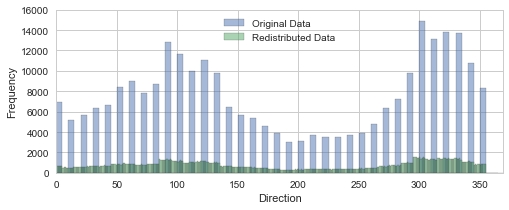

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


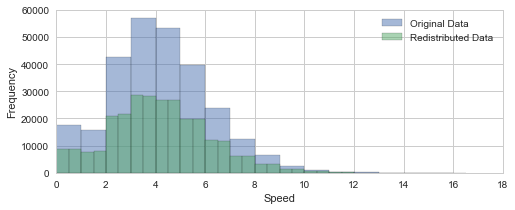

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.6 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? False
Report type used: FM-15
Sampling time used: [0, 30]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  8.718500e+04  87185.000000  87185.000000  87185.000000  87185.000000   
mean   2.012065e+07   1164.638413    184.768910      4.505171      6.524723   
std    1.413991e+04    692.254061    114.362565      1.981509      3.449085   
min    2.010010e+07      0.000000     -4.999554      0.000148      1.000000   
25%    2.011040e+07    530.000000     84.607067      3.136610      4.000000   
50%    2.012070e+07   1130.000000    167.008643      4.367230      7.000000   
75%    2.013093e+07   1730.000000    302.973604      5.732144     10.000000   
max    2.014123e+07   2330.000000    354.993172     17.958470     12.000000   

       dir_windrose             x             y  
count  87185.000000  87185.000000  87185.000000  
mean     211.968148      1.030022      0.400030  
std      239.037972      3.014567      3.730225  
min        0.000000    -17.129890    -11.524015  
25%       80.000000     -0.917589     -2.427138  
50%      140.000000      1.383205      0.097939  
75%      280.000000      3.307678      3.333451  
max      999.000000     17.923280     14.424134

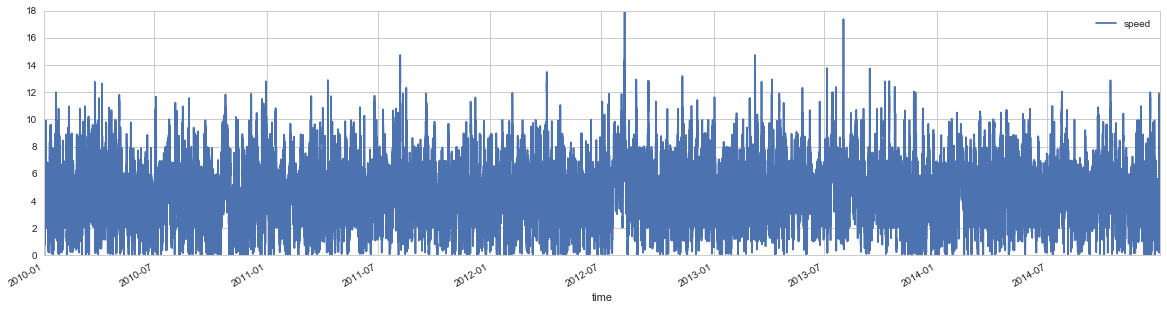

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

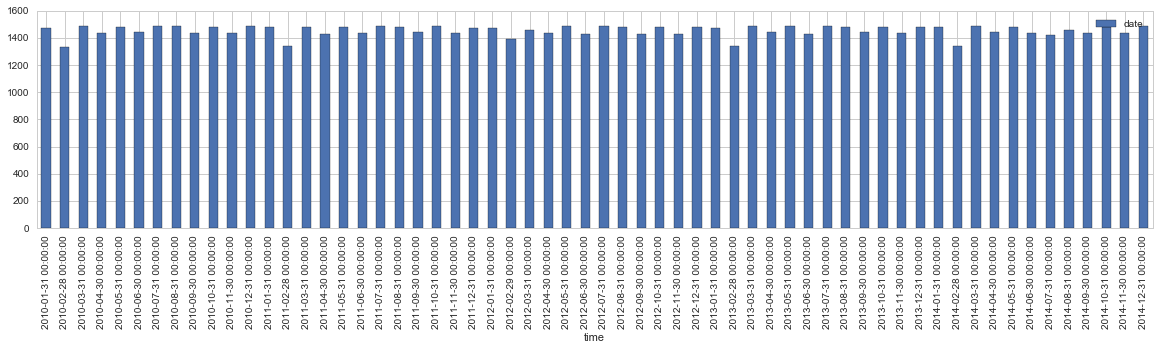

In [34]:
# df['date'].apply(lambda x: str(x)[:-2]).value_counts().sort_index().plot(kind='bar', figsize=(20,4))
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


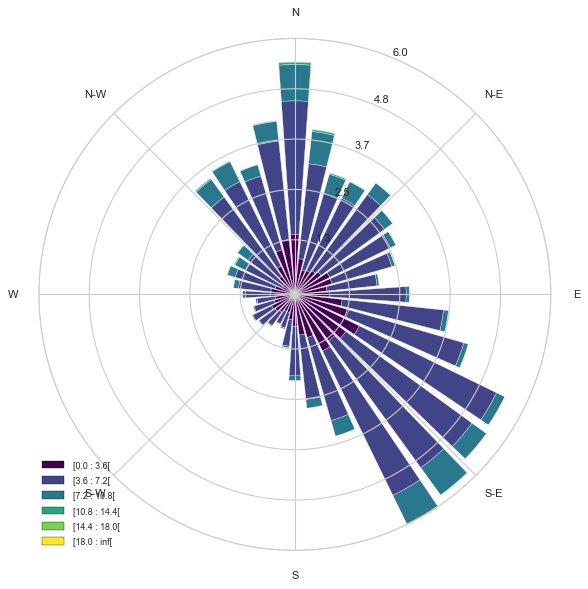

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtcVHX+x/HXzOAAMoMiKooK4gUtLyF4S8UUwwsVpoiA
iv5Wy93qtz2y2spayayUctvaLXS33bYtc5OkrPAHlHfKxBQbr3nJC3nHBVFnQEaY+f3hMiupMOjM
HJj5PB+PeTxm5pzvOZ/zQN9zLt/zPSqr1WpFCCEcSK10AUII9yPBIoRwOAkWIYTDSbAIIRxOgkUI
4XASLEIIh/NSuoDbVVhYqHQJQnisqKioG37f5IMFbr5x7qywsFC224M0xu2u60ddDoWEEA4nwSKE
cDgJFiGEw0mwCCEcToJFCOFwEixCCIeTYBFCOJwEixCNzIwZM9i1axcAZrOZqKgosrOzbdNTU1P5
8ccfr2uXn59PZmYmJ06cYPLkyXavb+jQobblHj58+Darv8otOsgJ4U6GDh3K9u3b6du3L4WFhQwb
NoydO3cCUFlZycmTJ+nZs+d17YYPHw7AiRMnXFrvjUiwCFGH3/3ud6xcudKhy0xMTGTx4sU3nT5k
yBCWLFnCzJkz2bRpE4mJiSxYsIBLly6xd+9eBg4cyLZt23jzzTfRaDR06tSJBQsWkJ2dzZEjR0hO
Tqa0tJTf/OY3lJSUMGLECB577DGee+454uLiGD58OPn5+eTk5JCenu7Qbashh0JCNDJ33nknR44c
wWq1sm3bNgYOHEjv3r357rvv+P777xk2bBjz5s3jnXfe4aOPPiIoKIhVq1bVWkZ5eTmLFy9mxYoV
fPPNN+zfv9+l2yB7LELUYfHixXXuXTiDWq2mZ8+e5Ofn06ZNG7RaLREREezYsYP9+/czdepU5s2b
xxNPPAHA5cuXGTJkCKGhobZl9OzZE71eD0CfPn04evRorXU4e6hrCRYHs1gsnD9/vkHzw9V/TA1d
j3BfQ4cO5a9//Sv33XcfAD169GDNmjUABAQE0K5dO5YsWYJer2fdunU0b96c06dP29ofPnwYk8mE
t7c3u3btIikpiS1btnDu3DkA9u3b59T6nRYsFouF+fPnc+DAAbRaLa+88kqtRF29ejUffPABGo2G
8PBw5s+fD1Bnm6bg/PnzfPDldvx0/nbNX3zmBBqNlsA2be1eh8l4kbtC5DfBnQ0ZMoTf//73vP76
6wB4eXmh1+u54447UKvVvPDCC8yePRur1Yqfnx+vv/56rWBp0aIFc+bMobS0lLi4OLp160ZiYiLP
P/882dnZdO7c2an1O+1f59q1azGbzWRmZmIwGEhPT2fp0qXA1V23t956i+zsbHx9fXnyySfZsGED
1dXVN23TlPjp/NH7B9g1r/HSBTReWrvn/6/yhhcmmowOHTpw4MCBWt8tWbLE9n7YsGEMGzas1vSJ
Eyfa3n/55ZfXLbNPnz61LlvX2Lx5MwDLli27rZqv5bSTt4WFhURHRwMQERHBnj17bNO0Wi0rVqzA
19cXgKqqKry9vetsI4RoOpy2x2I0GtHpdLbPGo2GqqoqvLy8UKvVtG7dGriakuXl5QwdOpTc3Nyb
tqlLYxpFrqysjDNnLnLJWGHX/OeKi9FotFRV278Ok/EC3Vr5N6rtdiXZ7sbPacGi0+kwmUy2zxaL
pVZAWCwWFi9ezNGjR3n77bdRqVT1trmZxjSyVklJCT+VHrT70EZlNaPx0tI2KNjudVy66AuUN6rt
dpXGOJKaKzTG7VZkBLnIyEjy8/MBMBgMhIeH15qelpZGZWUlS5YssR0S1ddGCNE0OG2PJTY2ls2b
N5OcnIzVamXhwoVkZ2dTXl5O7969ycrKon///syYMQOA6dOn37CNEKLpcVqwqNVqFixYUOu7rl27
2t7frCfgL9sIoaSG9kuyR0BAQIP7LTU10hlCiDo0tF9SfUzGi8yI709gYGCd823dupUnnniCbt26
YbVaKSsr49FHHyUuLu6G8586dYr9+/cTExPjkDpvlwSLEPVoSL8kRxo8eDBvvvkmcLWvyRtvvEFY
WBh33HHHdfMWFBRw5MgRCRZPd+nieZo10ypdhmgifHx8SEpKIicnh48++ogzZ85QXFxMTEwMjz/+
OO+++y6XL1+mX79+6PV63nnnHaxWKyaTyRZIriTBooDjxw4y77eJXLliRu8fQGDbYDp17kbb9p0I
Cg4lqH0ngoJD0OlbolKplC5XNBKBgYF8/fXXjB07lsTERCorKxk+fDhz5sxh9uzZHDlyhFGjRrF8
+XIWL15MUFAQf/nLX8jLy+ORRx5xaa0SLApY+cGfuXLFTPidkZScO8XPR37k2E97r5uvuZ+eoOAQ
2rbvRFj3XowdP51mWtnL8VSnTp2iX79+7N69m4KCAnQ6HWaz+br5goKCePXVV2nevDlnz54lMjLS
5bVKsLjYT/t3UrhlHeF3RpL2xkecOVUEqFGprJw99TNnT/1M8enjV9+f/pkTxw5x9NBetubnUV1V
xYMpv1F6E4QCysvLWblyJZMmTaKiooIFCxZQVFTEJ598gtVqRa1W2+54nzdvHmvWrEGn0/Hss886
fYiEG5FgcbFP/vkWAJN/9YTtMEfj5UXboGDaBV9/J7fFYuHfZ08y7/FE/u/T9xkdP9Wl9YqrV3KU
WFZBQQGpqamo1WrKysr47W9/S1hYGE899RQGgwGtVktoaCjFxcWEh4ezdOlSevXqRXx8PFOnTsXX
15fWrVtTXFzssPrtJcHiQnt+2MJeQwF9o4ZxR58BdrVRq9W0bd+J+ybNIvP9P5K76kNGx09xcqWi
RkBAADPi+zt8mfUZNGgQW7ZssX2+tkv/je5cDgoK4quvvgKwjeGiJAkWF7Farf/dW/mfJxrcfnT8
FHI+e5/cz/7J0Jj7oZX86VxBrVbX2+dEXM+9u/81IoUF6zl8YBcDh40hrHuvBrf38fXjgcSHqCg3
sm71CidUKITjSLC4gKW6mpUf/AmVWs2k6b+95eXce38KLQJasy7nEy5cuODACoVwLAkWF9iyKYcT
xw4RPWo8HUK61t/gJrx9fHlg8kNUXi53+CMphHAkCRYnq6q6Qtayt9F4NWPi1Mdue3mj4pJoEdCa
zz//XJGz/ULYQ4LFyTZ+9SnFp48zKm4ybdp1uO3lab19GDthOpcvX3b5YymEsJcEixOZKy+zavkS
vL19GZ/8a4ctd1jMA7Rp04aMjAzOnDnjsOUK4SgSLE60JvtflJWeY8yDqbRs1cZhy22m9WbKlClU
VFTw2muvOWy5QjiKBIuTlJuMfJn5Ls399Nw/aabDlz927FhCQkJYunQpp06dcvjyhbgdEixOkvvZ
PzFeusD9ibPw07dw+PKbNWvGvHnzqKysZNGiRQ5fvhC3Q4LFCYwXy8j57H38WwYyZvw0p61nxowZ
hIWF8e6773L8+HGnrUeIhpJgcYK8zz/kckU545N/jY+vn9PW06xZM9LS0jCbzTLwuGhU5IYTBzt1
6hQbv/qMwLbtGRWX5JR1WCwWLly4QElJCePGjSMsLIz33nuP2bNnExIScsM2njCAs2g8JFgc7A9/
+ANVV8wkTPtfpw3KVG66xDfHSzlXfRCAEfel8v47C/jt0y+S+pu5181v7wDOQjiK/IQ50E8//cTy
5csJCg5h2Kh4p67Lt7kOvX8Aev8AYsZNpn3HMLZszKHceMn2fc3LUSPMC2EvCRYHevHFF6muriY+
aTYajet2BtUaDQnTHsNiqebzj//isvUKcTMSLA6ya9cuPv74Y/r06UO/QSNcvv5B0WPpGNqNb9Z9
wZmTx1y+fiGuJcHiIGlpaVitVl544QVFTpKqNRomTvtfrBYLny1f4vL1C3EtCRYHKC0tZfXq1URG
RjJq1CjF6hg

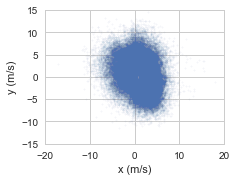

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2. Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANMAAAB6CAYAAAAlFGb/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEbFJREFUeJzt3XlQE/f7B/B3ICB8BYUWpR1bLIjAYA3gAXUQHCuUn6Va
UUBAsBWq4EwP69giVRDBgzrK1HHwQpzStF4/Bcap2mlBha8XFopaQKmgYC8xKkfCKcnn+4fDjpGQ
BFhIiM9rhhmz+5B9NvjOfrK72RUwxhgIIQNmpOsGCDEUFCZCeEJhIoQnFCZCeEJhIoQnFCZCeGKQ
YXry5AlSUlLg5eUFLy8vbNu2DXK5nLd6AJDJZJg3bx4aGxt7rUlKSoKzs7PST0pKSq/1t2/fxpIl
S+Dm5obAwEAUFRVpXlkNYmJievSQlZXVa31JSQmCgoIgEomwaNEi/P7779y8n3/+GQkJCf3u5ccf
f8TChQt7nZ+Xl4fQ0NAe0/38/HqsQ35+PgCgq6sLX3/9NWbOnAl3d3esWLECtbW1/e5xQJgBSktL
Y/7+/qysrIxdvHiReXt7s4yMDN7qGWMsNTWV7d27V21NWFgY2717N3vw4AH3I5VKVda2tbUxX19f
lpiYyKqrq1lGRgabPHkyq62t1bzCavj4+LDc3FylHlpbW1XW3r9/n3l4eLCdO3ey6upqlpyczLy8
vFhTUxNXs2jRIlZcXNznPi5cuMDc3NxYUFCQyvlFRUVMJBKxkJAQpeltbW3MxcWFXb16VWkdOjo6
GGOMbd++nc2ePZsVFxezO3fusE8//ZT5+/uzrq6uPvc4UAYXpvb2dubm5sby8/O5aTk5OWzGjBlM
LpcPuJ4xxh48eMDc3d1ZY2Oj2l48PT1ZYWGhVn3n5uayGTNmsM7OTm5aZGQkS0tL0+r3VZFKpczJ
yYlVV1drVb9r1y62YMEC7rFCoWBz5sxhYrFYqc/IyMg+9ZGWlsYmTZrE3nvvvR5hUigUbOvWrdz8
58NUXl7OXFxcuPA8b9u2beyXX35RqndycmJ///13n3rkg8EN827evIm2tjZ4enpy06ZNm4ZHjx7h
3r17A64HgKNHj8LDwwOjR4/utQ+JRILGxkbY29tr1fdvv/0GDw8PmJiYcNOmT5+OsrIyrX5flerq
agiFQtjZ2WlVX1ZWhunTp3OPBQIBpk6dqtTD7NmzUVZWhqqqKq37uHLlCrKzs/HOO+/0mCeXy3H1
6lWIxWK8/fbbKtdh3LhxMDU1VfncX3zxBfz8/AAAjY2NEIvFcHBwgK2trdb98cXgwlRfXw9zc3NY
Wlpy08aMGQMAuH///oDrAeD8+fPw8fFR20d1dTUEAgEyMzMxa9YsvPvuuzh48CAUCoXK+gcPHmDs
2LFK02xsbFBfX692OZp6sLCwwNq1azFz5ky8//77yM3N7bVemx5Gjx6NyZMno7CwUOs+cnNzMXXq
VJXzhEIhcnJy4OHhoXJ+TU0NhEIhYmNj4e3tjcWLF+PChQs96vbt2wcvLy+cOXMGKSkpMDY21ro/
vhhcmNra2jBixAilad3vap2dnQOul8vlqKyshKOjo9o+7ty5AyMjI9jZ2WH//v2Ijo5GRkYGDhw4
0Ke+VfWgrZqaGrS3t2PGjBk4cOAAFixYgMTERJw6dWpAPTg6OqK8vLzfffVFTU0NmpubERISgszM
THh6emLFihW4fv26Ut3cuXORk5OD+fPnIzY2Fnfv3h2S/p4lHPIlDjIzM7Mef/zux+bm5gOub2xs
hFwuh7W1NTfto48+QmlpKff41KlTiIiIQGBgIKysrAAAzs7OaGpqwrfffosVK1Zo3YeZmZnK9QwM
DMQ///zDPVY1HFyzZg3i4uK44aiLiwv+/PNPiMViBAYG9rsHKysr3LlzR2VffPvmm2/Q0dEBCwsL
AICrqysqKytx6NAhuLm5cXXdQ9mNGzfi119/xYkTJ7BmzZoh6bGbwYXplVdeQWtrK2QyGfcHkEgk
AKByHN3XeoFAAABKw7XNmzejvb2dezx27FgIBAIuSN0cHR3x8OFDyOXyHsMQW1tbbrndJBJJr2P/
/fv3o6urS+W8bsbGxj0+102YMAHnz59XWa9tD3K5HEZGQzOoMTExUfocCTx9HauqqiCXy3Hu3DmI
RCJueGpkZARHR0c0NDQMSX/PMrhhnouLC8zNzZW2FCUlJbCxsVH5Qbyv9dbW1hAKhUp/LFtbW4wf
P577EQqF2Lx5M5YtW6b0u+Xl5XjjjTdUjuc9PDxQVlamFJCSkpJeP0uMGzdOaZmqfPzxx1i3bp3S
tIqKCjg4OKis9/DwQElJCfeYMcbtGHlWQ0MD97lysM2fPx979+5VmlZRUYEJEybA2NgYycnJyMvL
4+Z1dXXh5s2bmDhx4pD09yyDC5OZmRmCg4ORkpKC0tJSXL58GTt27MDSpUu5msbGRu5gqzb1zxII
BHB1ddW4N8vPzw9XrlzB/v37ce/ePeTl5eHAgQNYuXIlgKfv7hKJhNuide/pSkxMRE1NDfbs2YMb
N24gLCys36+Fn58f8vLycOLECdy7dw/Z2dk4efIk4uLiADwdwkkkEm5oFxwcjOrqaqSnp6Ompgap
qaloaWnBvHnzlJ63qqoKkydPBgC0t7dDIpFoPMjdX3PmzEFWVhYKCgpw9+5dbN++HeXl5fjwww8B
AFFRUcjMzMTZs2dRU1ODdevW4cmTJwgODh6UftQRMKZ/Xw58divRH52dncjOzsaVK1dgYmICX19f
hIWFcUOT1NRUAE//42pT/7ycnBzcvn0b8fHxavu4evUqcnJy8O+//8La2hrz5s3DnDlzADwdPn32
2WeIjY3FrFmzAAC1tbU4ePAg6urqYGtri8jISIhEogG9Fvn5+Thz5gwePnwIW1tbhISEcLu/Kysr
sWnTJqxfvx6urq4Anm49v/vuO9TX18POzg7Lli1T2pK1trYiNjYW27Ztw6uvvorCwkLs27cPO3fu
1Li1On78OMrKyrB582aV848dO4by8nKls0QUCgVyc3NRWFiIpqYm2NnZITIyEs7Oztz8kydP4uzZ
s2hqaoKzszM++OADjBs3bkCvmzq97ZnUy4O2JSUlum5Brfv37zM3NzcmkUiUput73+po2/uRI0fY
0qVLlaYtX768x2sxlIbydVe3LIMb5g0FW1tbBAUF4ejRo7puZUgxxnD48GFuqAo8PdhsZGQEGxsb
HXamHyhM/bR69WqcPn1a7Ymuhuann36Ck5MT3nrrLW6aSCTCnj17dNiV/jC4XeNDxdLSsteDn4Zq
7ty5mDt3rtI0oZD+C3WjLRMhPKEwEcITChMhPKEwEcITChMhPKEwEcITChMhPKEwEcITChMhPKEw
EcITChMhPKEwEcITrcJ0/fp1REVFAQDq6uoQHh6OiIgIbNiwgbsWwrFjx7Bw4UKEhobi3LlzAJ5+
C/OTTz5BREQEli9fjsePHw/SahCiexrDlJmZifXr16OjowMAsHXrVqxatQqHDh0CYwwFBQWQSCQQ
i8U4cuQIsrKykJ6ejs7OThw+fBhOTk44dOgQFixYgN27dw/6ChGiKxrDZGdnh127dnGPKyoquKuf
+vr64tKlS7hx4wY8PDxgamoKS0tL2NnZ4datWygtLeUu1ujr64vLly8P0moQonsav4wSEBCAv/76
i3vMGOMudzVy5EhIpVLIZDKlK6KOHDkSMplMaXp3rbYGeh0IXRmufQPU+0D1+Ztdz15kpKWlBaNG
jYKFhQVaWlqUpltaWipN767VVq8XrdBjpaWlw7JvgHrvy7J60+e9ea6uriguLgYAFBUVYdq0aRCJ
RCgtLUVHRwekUilqamrg5OSEKVOmcNekLioqGrZ/LEK00ectU3x8PBITE5Geng4HBwcEBATA2NgY
UVFRiIiIAGM

## 2.3 Overview by Month

In [41]:
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd8VfX9/593j9yVm9ybvSchgAxRNjIUJ4jVttbRVuvP
umpbtbZ+LY66WhVH+7W16rfVqlWcVVEcyJIlgiAzeyc3N8lNcvf+/RHuhZgbksBJCDWvxyMPyBmf
c3LveZ33fr9F4XA4zBjGMIZTAuKTfQNjGMMYBo8xwo5hDKcQxgg7hjGcQhgj7BjGcAphjLBjGMMp
hDHCjmEMpxDGCPsdwFjk7r8HY4QdASxYsICioiIefvjhmPsbGxspKiqiqKiIjo4OQa/96aefsmLF
iujvTz/9NJMnTxb0Gg6Hg7POOouPPvpI0HXH0BdjhB0hiEQiPvnkk5j71qxZM2zX/ec//4nFYhm2
9R0OBzfccANNTU3Ddo0xHMEYYUcIkydPpqGhgf379/fZ99FHH1FUVHQS7urEsH37di699FIOHjx4
sm/lO4Mxwo4Qxo0bR0ZGRh9p2tTUxDfffMOSJUv6nPPJJ59wySWXcNpppzFv3jyeeOIJAoFAdP+C
BQv4+9//zooVK5g+fTpTpkzhN7/5DQ6HA4Arr7yS7du3s27dOoqKimhoaIieu3r1as455xwmTJjA
8uXL2blzZ3RfQ0MDRUVFPP3008f8m2688UYKCwt57rnnjuszGcPQMUbYEcTZZ5/dRy1es2YNkyZN
Ijk5udf21157jZtuuomJEyfy5z//mSuuuIIXXniBO++8s9dxf/vb3+ju7ubxxx/n1ltv5YMPPuCZ
Z54BYMWKFZSUlDBlyhRee+01zGYzAG63m5UrV3LLLbfw5JNP4na7ufnmm6MvA7PZzGuvvcall156
zL/n5Zdf5sknn8RoNJ7Q5zKGwUN6sm/gu4QlS5bw/PPPU1lZSV5eHtCjDp977rm9jgsGgzzxxBOc
f/75UYfR7Nmz0Wq1rFixgmuvvZbi4mIAkpOTefzxxxGJRMyePZv169fz3HPPMX36dObNm4dGo0Gt
VvOrX/2KF198EejxGv/pT3/itNNOAyAQCHDzzTdTUVFBcXExcrk8uu9YKCwsFOyzGcPgMCZhRxAT
JkwgJSWFjz/+GIDm5mb27NnDOeec0+u4qqoqOjo6+qjJ559/PgA7duzotaZIJIr+bjKZgB7parfb
Y96HRCJh4sSJ0d/T0tIA+j1+DKMHY4QdQYhEol5q8Zo1a5g4cSIpKSm9juvq6gIgISGh13atVotc
Lo/aqAAqlarPNSQSCbNnz+ahhx6KeR8KhQKx+MhXH/l/KBQ6zr9sDCOFMcKOMM4++2z27dtHQ0MD
a9as6aMOAxgMBgDa29t7be/u7sbn80X3Hwt33nknW7ZsobOzU5gbH8OowBhhRxhTpkzBZDLx73//
m927d/dRhwFycnKIj4/vk4iwevXq6BoDQaPRcP/991NTU9PLszyGUxtjTqcRhlgsZvHixfzjH/+I
2rTfhkQi4aabbuL+++9Hr9ezcOFCDh06xNNPP82SJUsG7eyZPXs2JpOJXbt2oVKp8Hq9gzrP5/Ox
f/9+kpOT+3ivx3ByMSZhTwLOPvts/H5/zNhrBFdccQUPPPAA27Zt4/rrr+fll1/mJz/5CY8++uiQ
rnXffffhdrtpa2ujoqJiUOe0trby/e9/n1WrVg3pWmMYfojGejr9d6GhoYGrrrqKtWvXRrdt2rSJ
a665hs8++4z09PSTeHdjOFGMEXYMYziFMKYSj2EMpxDGCDuGMZxCGCPsGMZwCmGMsP8FCIVC+P1+
fD4fPp8Pr9eLx+PB4/Hg9Xrx+Xz4/X4CgcCo6T7hcDi48MILoxVEZWVlXHbZZSxZsoRbbrkFl8vV
5xy/38/vfvc7zjvvPM4//3x279490rd90jEWhx3FCIfDUSL6/f7oz9Ek9Af8hENDI6FEIkYmkyOT
yZDL5cjlPf+P/CgUCqTS4Xs0du3axe9//3uqq6uj226//Xbuuusupk+fzpNPPskzzzzDr3/9617n
vfzyy4TDYVavXk1FRQU33ngjH3zwwbDe62jDd+cvHeUIh8P4fD5cLhdOpxOn04nL5SIUCiEWi6M/
UqkUqVSKSqVCr9dz0LWdL+1r8GDHh4cwQRCDNCznosDt/Ef6JwJhHxJkyFGhRs8C4w8xSMxRiexy
uQgEAoRCIUKhEOFwGJlMhlqtjlb7qNVqwYjx+uuvs2LFCu644w6gpwjCbrczffp0AC699FKuvPLK
PoT9/PPPufHGGwHIz88nKSmJXbt2cfrppwtyX6cCxgh7khAIBLDb7X3IKZVKkclkqFQqEhIS0Ov1
yGSyftepsxaQI4onEIZACIJhCIVBFAYCkKO4AZEYJGKQikXIxGEUWjNp8Wkx1wuHw7jdbrq6unA6
nbS1teH3+wmFQr1IHBcXh0aj6VUpNFh8uyjBYrGQlJQU/d1sNsdsaxPruJaWliFf/1TGGGFHEF6v
l87OTmw2G06nE4lEEiWByWRCr9cjkUiGtOYBm4P7d23ss10lkvDPvMU8umcz7nCw177XFlzV73oi
kSgqUY+Gz+fDZrPR3d2N1WqlqakJkUiEXq/HYDAc171HEKtKKNaLIJb9fXTV0XcBY4QdRoTDYVwu
Fzabjc7OTrxeLzKZDI1GQ1paGlqt9oSvESeVD/kctbR/id0f5HI5SUlJUQkXCoXo6Oigvb2duro6
gsEgcXFxGI1G9Ho9CoVi0GsnJydjtVqjv1ut1pg5zElJSVitVrKysqLHHS1xvwsYI6zACIfDUVWy
s7OTUCiEQqHAYDCQlJR0TPX2eKA+DsIeD8m/DbFYTGJiIomJiQA4nU5aW1tpaWmhvr4ehUJBfHw8
JpMJufzY10tNTUWlUrF9+3amT5/Om2++ybx58/ocN3/+fN58802mTZtGZWUldXV1vQrxvwsYI6xA
CAaD2Gw2LBYLXq8XhUJBcnIyZrN5WNW2oRJWLpagEoCw30ZcXBw5OTlAj+pvsVhob2+npaUFvV6P
2WxGq9X2a/M+9thj3H333djtdtLT03nssccAePXVV2ltbeUXv/gFV1xxBffeey/nn38+IpGIBx98
cMCXwX8bxnKJTxAej4fW1lba2toQi8UYDAbS0tIEl6T9YVtrLZd//q8+2yM27NWVn/SyYc1KDZ+c
dz0a2eBV1hOBw+GgsbERp9OJVColKSmJhISE71QoRkiMfWrHgXA4TGdnJxaLBafTiVKpJCsrC6PR
eFxe0xPBUNVbg0J1XGr08UKj0VBUVEQwGKS5uZmWlhYaGxsxGo2YzeY+zq0xHBtjhB0CwuEwHR0d
NDY2EgwG0Wg0jB8/HqVSedLuSTVEB1KaWod4hF8q0FOUn56eTnp6OjabjaamJg4cOIBGoyE9PZ24
uLgRv6dTEWOEHQTC4TDd3d3U19fj9/uJj48nIyPjuMMYQkItlSMRiQgO0rJJVuuH+Y4GRnx8PPHx
8bjdbmprazl48GDUlDiZL79TAWOEHQAOh4P6+nrcbjcGg4GsrKxRQdQI1FIZermKDm/f3NtY0MtH
DyFUKhXFxcW43W6qq6vZt28fCQkJpKamfuecSYPFmNOpH7jdbhoaGrDb7Wi1WrKzs0fMkTQU+IIB
3tq5F5vTQyAYOpxeGEYsgtkJar7ocBMWgVQsRiIRU5Ri4qzCvJN92zHhcDioqanB5/NhNptJTk4e
c059C2OfxrcQCASor6+no6MDtVrNuHHj+vT+HU2QS6R8/HUF26rqe21XSiXMXjaLf27YiSdwxEt8
5wXzYJQ27NdoNJSWltLR0UFDQwNWq5WUlBSSkpJG3Jk3WjFG2KNgs9mora1FLBZTUFCATqc72bc0
KKQYBp8xpT4

# 3. Create input data and configuration

In [42]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [43]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


In [44]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

# The bandwidth value sometimes would be too radical
if knot_unit:
    bandwidth_range = arange(0.7,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

# Grid search is unable to deal with too many data (a long time is needed)
if len(sample) > 50000:    
    df_resample=df.sample(n=50000, replace=True)
    bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
else:
    bandwidth_search_sample = sample

grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

grid.fit(bandwidth_search_sample)
bandwidth = grid.best_params_['bandwidth']
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.4
Wall time: 2min 34s


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.4 289
[  4.38079407e-06   1.46429857e-06   2.13558739e-06   2.29252044e-06
   2.34156842e-05]


In [48]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUI/V5JvyU7i211Or7dPf0ReoZDMx4uF9sMN8ahw/H
SzI2Hk8yY5gNmMRLEmPPxtiGs2CfDIT4swNnwzEkhly+hbATEo7jZM3aG2M7znFY7Mx8hHhgbKbv
F93VuktVUlV9f4hfdalUVaoqVXdL7XrO4dgzU/rp1+qqR+/vfZ/3eSme53lYsGDBwi6Fbac3YMGC
BQtbCYvkLFiwsKthkZwFCxZ2NSySs2DBwq6GRXIWLFjY1bBIzoIFC7saFslZsGBhV8MiOQsWLOxq
WCRnwYKFXQ2L5CxYsLCrYZGcBQsWdjUskrNgwcKuhkVyFixY2NWwSM6CBQu7GhbJWbBgYVfDIjkL
FizsalgkZ8GChV0Ni+QsWLCwq2GRnAULFnY1LJKzYMHCroZFchYsWNjVsEjOggULuxoWyVmwYGFX
wyI5CxYs7GpYJGfBgoVdDcdOb8DCzoPneTAMg1qtBrvdDqfTCZvNBoqidnprFiy0DYrneX6nN2Fh
50DTNLLZLPx+P6rVKgBgfX0d/f398Pv9sNlsFulZ6GpYkdwvMFiWRblcRiKRgM/nQ61Wg9PpBM/z
4HkeLMuiVquBYRhQFAW73W6RnoWug0Vyv4DgeR61Wg0sy4KiKLAsi7m5ObAsC4fDAY7jUCqV4Ha7
4XBs3iKE9Giahs1mg91uh91uh8PhsEjPQsfCOq7+goHjOFSrVZBfeyQSQTqdxtTUFFwuFxiGQTQa
BUVRqFarcDgc8Hq96Onpgdfrhd1ub1iPrENRlEB2Doej6ToLFnYKViT3CwJy/GRZFgBQq9WwuroK
juPgdDrh9/vBMAw8Hg+cTif6+vrg8/lA0zRKpRKy2SxisZhAeoT4xGRWq9XA8zxomkY8Hsfo6Chc
LpdFehZ2FBbJ/QKA4zjUajVwHAeKopDP57G2toaBgQEEAgEsLy83XE9RFHieB0VR8Hg88Hg8GBgY
AM/zqFQqKJfLyGQyiEajcDqdAuGJSa9YLIJhGIH0yPHWivQsbDcsktvlIHk0UkyIRqPI5XKYnJwU
IjWtGQuKogQyE5NeqVRCJpNBJBKBy+WC1+sFz/MCqQKbeUCL9CxsNyyS26XgOA4sy4LjOAAAwzBY
WVmBy+XC7OysUFBop1ggJj3yniTS4zgOKysrcLvdQj6vp6cHNltdf26RnoXtgkVyuxAcxyGZTCKb
zWJqagobGxuIRqMYGRnBwMBAE7FJIzlyXNULm80m5OtyuRzGxsaESm06nUalUoHb7W443qqRXqFQ
QCAQgNvttkjPgmFYJLfLQI6nQJ04VldXUS6XEQqF4PF4mq7fStmHzWaDx+OB1+sFUCffcrmMcrmM
VCoFmqbh8XiESM/j8TSQXjweh8PhQK1WsyI9C4ZhkdwugVT7Vq1WUSgUEAwGMTs7K5CH0muBrSU8
oE56Pp8PPp8PwCbplUolJJNJgfRIpEeKHySyVDreulwuS6NnQREWye0CSLVvyWQS8XgcLpcLExMT
qq+VIwejx1W9kJIe6cAgXRi1Wg3RaBQ+n0+I9FoVMkjvrUV6FggskutykOgNqJPE2toaarUa9uzZ
g1wup2mNTtGD2+129Pb2ore3FwAwPz+PQCAAhmEQj8dRrVYbIj050qtWq6hUKgLpURQFp9NpHW9/
gWGRXJdCejwtFApYXV1FMBjE1NQUisWiJvJSinjMIL5216AoCl6vF8FgEMBmpFcqlRCLxVCr1QTS
83q9cLvdTaQXiUSENaxI7xcTFsl1IcTaNwCIxWLY2NjAxMQE/H6/cJ1RkjGDALaCRKSRXq1WE0gv
Go2iVqs1yFXcbrewF6VIzyK93Q+L5LoIPM8jlUrB6XTC4/GgWq1idXUVFEVhdnYWTqdTuFbrQ7td
+betgMPhgN/vF4hdTHqZTAYsywoFF7fb3VCgEJMeyekR4rNIb3fBIrkuAWnN2tjYEPJUa2trGBoa
wtDQUNND2S55dSPxyZHe+vq68L8syzaYDYhJj+M4oYAjJj2HwwGHw2GRXhfDIrkuAMuygqElAGxs
bIBhGExPTwsaNKMQ96mK/243gBAUIb5qtdoQ6XEcJxCe1+ttiODEpFetVpHP5zE6OmqRXhfCIrkO
hrS4UKlUUCgU4Ha7sW/fPtWKYTcfQ7cKTqcTTqcTgUAAAFCtVlEqlVAul5FOp8HzfEOkR0ivVquh
VCoJx1uKoqxIr4tgkVyHQuwcAgDpdBqxWAwejwd9fX0tJRFaSY48nLlcDtlsVhDh/iIQJLGU6uvr
A8/zDZFeOp0GAPT09AhGouKIVxzpWaTX2bBIrgMh1r5xHIf19XVUKhWEQiHh4TMLhEQjkQj6+vpQ
KBRQLBZhs9lQrVaFo9xO6MzMkrFoIRyKouByueByuRpIr1QqIZ/Pg6ZpLCwsyEZ6gEV6nQyL5DoI
0uNpqVTCysoK/H6/0JqlJ0JrdR1xJgGAcDgsXB+PxwHUI51cLodYLAan09kgz9BCemaQ1E6Rg5j0
nE4n0uk0RkdHUSqVUCwWkUwmYbPZGj4TJdID6vIXImYW6/ksbD0skusQSLVviUQCyWQS4+Pj6Ovr
M7SmGsnkcjmsra1heHgY5XIZdrtdaOwnZNrf34/+/v4G37iNjQ1EIhHBTUTaWE+wmx5inueFHlmX
y4VgMCiMcSyVSigUCojH47Db7Q2FDHEEx3Ec4vE4fD4f/H5/w1Ag0plhYWtgkdwOg+d5FItFRCIR
TE1NgWVZwZZ8dnYWLper4Xq9uTYpOI5DLBZDLpcTqrPxeFx1TbFv3ODgoOAbJ9dYT0ivU6D1uKoX
FEXB7XbD7XYLXwSE9PL5vEB6Yqt4seGAXKRHhgJZpGcuLJLbQZDiApmARWzJ+/v7MTIy0lbzvNx1
5HjqcDhaVmfVIPaNIz8HqVKSHlMAQu9stx/PtBClHOnRNI1yuSwc+YlbMrBZ0JAebxmGAYCmoUDd
/PntNCyS2yGIj6fEGmltbQ179+4V2pbkoEcaIr4um81ifX0dw8PDGBwcbNLFkX2I/1crbDZbQ7sV
y7JYWloSXERqtZqiCLcbYCS3KJ6PQUhveXkZDoejaSiQeBIa+VzI0CHpzFuL9PTDIrlthpzv2+rq
Kniex759+xrmnKqt0QriCCEajSKfz5siHtYCcvQaGBiAx+MRdGYkp0f0aGIR7lbBrONqu2uQimsg
EBBmYBCr+Gw2i2g0CpfL1VTckSO9SCSCsbGxhkloFukpwyK5bYR0ahaJrgYGBoQZp62gpyeV4zjM
z8/D5XK1PJ5upS7O4XAgEAg0iXBJTo+4jYgT9p2Ercjr6RkKJJ6ERlEUyuWy0AVjRXqt0Vl30y6G
WPvG8zzW19dRLBYxMzMjSBS0QOtRMpfLged59Pf3y851kK4p/TPJHbUDpX1KRbjSKqXD4UBPT48w
jGcrI73thBpZqg0FEle0yecidXO2jrfKsEhuiyHXmrWysoKenh7Mzs7CbreDZVldYwHVrhUfTwFg
cHBQ8z534kFQStiXSiXwPC9MGBNXKdWs3KXYTkGxmeuIizvSijbP81hcXJQdCiQmvVqtZpEeLJLb
Ukgb61OpFOLxOPbs2YP+/n7h7/Uk+tWupWm6Yezg+fPnNa9pNoyuKU7Yb2xsYHJyEizLyk78UtLo
mbUXs9EOWYpJL51OIxwOC18GrYYCAfKkR9M0ent7d31HhkVyWwCe58GyLM6dO4d9+/YBANbX18Ew
DMLhsGDmSKC3mil3LcnvkbGDRvZMbvROau6X0+iRORBEo0f+XToHwizsVJQrB/J7kZPxyA0FUiO9
xcVFTE9PC4J

In [49]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [50]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [51]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.435   2.815  -2.562  1.875  2.221   0.053
2  0.285   1.591   3.881  2.346  2.393  -0.223
3  0.280  -2.312   1.466  2.223  3.018  -0.149

GMM Plot Result
0.435234451024 [[ 2.81521386 -2.56216758]] [ 1.86638306  2.22844964] 171.356322801
0.284528714582 [[ 1.59086719  3.88121122]] [ 2.08771839  2.621209  ] -137.549973805
0.280236834394 [[-2.31198389  1.46610906]] [ 2.17115343  3.05547873] -167.201819113


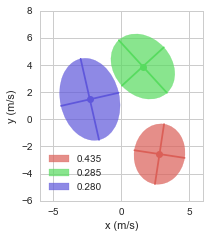

In [52]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [53]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUbHV9L/rZNXdVd/U8z90HCJPCYTJXkRsiDzzR3Hjx
gebFdcki9ybGpXEGBYQAR8EBc1/0EcUXfRd4C1iulyjB53oOKC/J1UjOJU8BTU5XT9XdNXRXdXXN
VXt4fzTf3b/atefa3V113J+1zjrndO39q9+u3vtT3/Hz5SRJkuDChQsX5yg8x70BFy5cuDhMuCTn
woWLcxouyblw4eKchktyLly4OKfhkpwLFy7Oabgk58KFi3MaLsm5cOHinIZLci5cuDin4ZKcCxcu
zmm4JOfChYtzGi7JuXDh4pyGS3IuXLg4p+GSnAsXLs5puCTnwoWLcxouyblw4eKchktyLly4OKfh
kpwLFy7Oabgk58KFi3MaLsm5cOHinIZLci5cuDin4ZKcCxcuzmm4JOfChYtzGi7JuXDh4pyGS3Iu
XLg4p+GSnAsXLs5p+I57Ay6OH5IkoVarged5eL1e+P1+eDwecBx33Ftz4aJlcJIkSce9CRfHh2q1
ilwuh56eHtTrdQDA5uYm+vv70dPTA4/H45Kei46Ga8n9GkMQBJTLZaTTaUQiEfA8D7/fD0mSIEkS
BEEAz/Oo1WrgOA5er9clPRcdB5fkfg0hSRJ4nocgCOA4DoIgYGlpCYIgwOfzQRRFlEolBINB+HwH
twiRXrVahcfjgdfrhdfrhc/nc0nPRdvCdVd/zSCKIur1OujXvrW1hUwmg5mZGQQCAdRqNSQSCXAc
h3q9Dp/Ph3A4jK6uLoTDYXi93ob1aB2O42Sy8/l8Tce5cHFccC25XxOQ+ykIAgCA53nE43GIogi/
34+enh7UajWEQiH4/X709vYiEomgWq2iVCohl8shmUzKpEfEx5IZz/OQJAnVahWpVAqjo6MIBAIu
6bk4Vrgk92sAURTB8zxEUQTHccjn89jY2MDAwACi0SjW1tYajuc4DpIkgeM4hEIhhEIhDAwMQJIk
VCoVlMtl7O7uIpFIwO/3y4THkl6xWEStVpNJj9xb19JzcdRwSe4cB8XRKJmQSCSwt7eH6elp2VIz
G7HgOE4mM5b0SqUSdnd3sbW1hUAggHA4DEmSZFIFDuKALum5OGq4JHeOQhRFCIIAURQBALVaDevr
6wgEAlhcXJQTCq0kC1jSo/ckS08URayvryMYDMrxvK6uLng8+/XnLum5OCq4JHcOQhRFbG9vI5fL
YWZmBtlsFolEAiMjIxgYGGgiNqUlR+6qVXg8Hjlet7e3h/HxcTlTm8lkUKlUEAwGG9xbPdIrFAqI
RqMIBoMu6bmwDZfkzjGQewrsE0c8Hke5XMb8/DxCoVDT8YdZ9uHxeBAKhRAOhwHsk2+5XEa5XMbO
zg6q1SpCoZBs6YVCoQbSS6VS8Pl84HnetfRc2IZLcucIlLVv9XodhUIBfX19WFxclMlD61zgcAkP
2Ce9SCSCSCQC4ID0SqUStre3ZdIjS4+SH2RZarm3gUDArdFzoQmX5M4BKGvftre3kUqlEAgEMDk5
qXuuGjnYdVetQkl61IFBXRg8zyORSCASiciWnlEig3pvXdJzQXBJrsNB1huwTxIbGxvgeR5jY2PY
29sztUa71IN7vV50d3eju7sbABCLxRCNRlGr1ZBKpVCv1xssPTXSq9frqFQqMulxHAe/3++6t7/G
cEmuQ6F0TwuFAuLxOPr6+jAzM4NisWiKvLQsHieIr9U1OI5DOBxGX18fgANLr1QqIZlMgud5mfTC
4TCCwWAT6W1tbclruJberydckutAsLVvAJBMJpHNZjE5OYmenh75OLsk4wQBHAaJKC09nudl0ksk
EuB5vqFcJRgMynvRsvRc0jv34ZJcB0GSJOzs7MDv9yMUCqFeryMej4PjOCwuLsLv98vHmn1ojyr+
dhjw+Xzo6emRiZ0lvd3dXQiCICdcgsFgQ4KCJT2K6RHxuaR3bsEluQ4BtWZls1k5TrWxsYGhoSEM
DQ01PZStklcnEp8a6W1ubsp/C4LQIDbAkp4oinIChyU9n88Hn8/nkl4HwyW5DoAgCLKgJQBks1nU
ajXMzs7KNWh2QWRYLBaRy+Xk7oVzAURQRHz1er3B0hNFUSa8cDjcYMGxpFev15HP5zE6OuqSXgfC
Jbk2hjK5UKlUUCgUEAwGceLECd2MoVlLjo6Jx+OIRqPY3d1FqVSCz+eDIAhNnQmdDL/fD7/fj2g0
CgCo1+solUool8vIZDKQJKnB0iPS43kepVJJdm85jnMtvQ6CS3JtClY5BAAymQySySRCoRB6e3sN
SyLMkFy9Xsf6+joAYGFhQf55KpWS35ftTCCLhy3d6GSQpFRvby8kSWqw9DKZDACgq6tLFhKl4mSg
0dJzSa+94ZJcG4KtfRNFEZubm6hUKpifn5cfvlbByi2VSiX4/X7ZJeY4DoFAAAMDA/Ie6OFX1qsp
SzechFNlLGb2RtccCAQaSK9UKiGfz6NarWJ5eVnV0gNc0mtnuCTXRlC6p6VSCevr6+jp6ZFbs8y6
oVrHSZKEZDKJ3d1dTE1Nobu7G+l0WndNtc4EcvOUpRsU0Kf3ahXHRQ4s6fn9fmQyGYyOjqJUKqFY
LGJ7exsej6ehZEWL9ID98hf6cjisLwUX6nBJrk2grH1Lp9PY3t7GxMQEent7ba2pJBlyTz0eD06c
ONEwv4GFEZF6vd6mLGapVGoI6EuShEKhIA++6eSHWpIkuUc2EAigr69PHuNYKpVQKBSQSqXg9Xob
yJ614ERRRCqVQiQSQU9PT8NQIOrMcHE4cEnumEGZza2tLczMzEAQBFmWfHFxUbaKCFYsORbkng4O
DjaVnLRabuLz+RCNRhsC+uvr66hUKsjlcnLnAmvxHBXMuqtWwXEcgsEggsEg+vv7G0gvn8/LpMde
Nys4oGbp0VAgl/SchUtyxwhKLtAELCKi/v5+jIyMtNQ8T8eRe5rL5WQ14MMGWSdDQ0MIBoNybIu1
eNiHX8uibBeYIUo10qtWqyiXy9jb20MymZTVkoGDhIbSva3VagDQNBTIJT37aO+76xwG656SNNLG
xoYcJ9OCFatLFEXEYjF4vd4GNWCtNZV/OwE2tqV08+jh1xuO0w6w81mw8zGI9NbW1uDz+ZqGArGT
0IjMaOiQcuatS3rW4ZLcEUNN9y0ej0OSJN04mXINIxQKBYiiiGg0qtoRcVxQs3jY4TjsnAiyblqB
U+5qq2tQxjUajcozMOi6c7kcEokEAoFAQyJDi/S2trYwPj7eMAmtXX6/7QiX5I4QyqlZuVwOm5ub
GBgYkGecGsHoZhZFUXZPOY7D8PCwqb0dVxuXcjgOzYkolUoQRRFra2ua6sFHhcOI61kZCsROQuM4
DuVyWe6CcS09Y7gkd0Rga98kScLm5iaKxSLm5ubkEgUz0HMlaViNz+fDwsICzp49a3pN5f9btaAA
e8SpnBMxOTkpZ2/T6TRqtVqDtdNJhcl6ZKk3FCibzWJra0seCkTZazoPcN1bPbgkd8hQa81aX19H
V1cXFhcX4fV6IQiCpbGAaseSVTg8PIzBwUE56WBln+34IGipB7OacsoaPfY6jrKg2Ml1WLIfHBxs
sHAlScLKyorqUCCW9Hied0kPLskdKpSN9Ts7O0ilUhgbG0N/f7/8cyuBfuWxoigikUggn883Nexb
WdNpOEUKSuhpyqk13bcTebeyF5b0MpkMFhYWUK1WUSqVDIcCAeqkV61W0d3dfc53ZLgkdwiQJAmC
IODll1/GiRMnAACbm5uo1WpYWFiQxRwJVrOZdGy1WpVnqRo17JtZk270TtKYU8orKZvueZ7Hzs4O
enp65FYsq2g

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC3CAYAAADpeknXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlQVFf6979NYyNLI69BASEsglv8aQyimcxiEo1ZLJOR
EAPGMDWlZZaJGbdx1ETUSlAczZiqCWomTs0Yt5Fo/lBnpsyiMdYkFeMyoEHBjUWQVUWaRVqb+/4B
53L7cve+ffu2nE9VV8Hdzmnobz/Pec5zzmNhGIYBhUIxHQG+7gCFQhGGipNCMSlUnBSKSaHipFBM
ChUnhWJSqDgpFJMS6OsOUChmprOzE2vWrEFpaSlsNhtyc3ORkJDAnj969Cg2b96MwMBAZGRk4OWX
X8bdu3fxzjvvoLq6Gk6nE2+++SamTJmCiooKLF++HBaLBcOGDcPq1asRECBhHxkKhSLKF198wSxb
toxhGIb53//+x7zxxhvsOafTyTz11FNMU1MT09HRwbz44otMQ0MDs3//fiY3N5dhGIa5desW8/jj
jzMMwzCvv/4688MPPzAMwzA5OTnMl19+Kdk2dWspFAlOnz6NX/3qVwCAcePG4aeffmLPXblyBfHx
8RgwYABsNhvGjx+PkydP4tlnn8WCBQsAAAzDwGq1AgCKi4sxceJEAMCkSZPw/fffS7Zterf29OnT
vu4CxeSMHz9e8nxh4RG4XBGC52w2G8aMGSN6b0tLC8LCwtjfrVYr7t27h8DAQLS0tMBut7PnQkND
0dLSgtDQUPbe3//+91i4cCGALqFaLBb2WofDIdlv04sTAAre+8arz3c4WmC3h8lfaACXG9vZn5PH
xPc673A43D4Qclw5V8n+nBIZ7FnnVGDU3zRz1ZOy17hcEYiNXyd4rrryHcl7w8LC0Nrayv7e2dmJ
wMBAwXOtra3s/6ampgZvvfUWXnnlFTz//PMA4Da+bG1tRXh4uGTb1K01CZcb21lhJo+JFxSmFrjP
4rZBUUZqaiqOHz8OACgsLMTw4cPZc8nJyaioqEBTUxOcTidOnTqFRx55BI2NjZgzZw6WLl2Kl156
ib3+oYcewokTJwAAx48fR1pammTbfmE573e4ovQW5NlXzlXicmO7oVbUn5k6dSq+++47ZGVlgWEY
rFu3DocOHUJbWxsyMzOxfPlyzJ07FwzDICMjA1FRUcjNzUVzczO2bNmCLVu2AAC2bduGZcuWIScn
B5s2bcLQoUPxzDPPSLZtYRhzr0o5ffr0fevWyrmwQqh1a4Ugrq43BWqkWys35jx9+rSkWyt3v6+g
ltNHGGEtxWDdXANEStEOHXMaDBn36Tmu1Ap3LEoxH1ScBuKptSxuatKzOwCoQM0MdWu9CP8Dr4co
y5xOWLt/Hx0hPHenluQx8WygCKBurlmg4tQZvQQJuIsyeXg0APeAUPHFWva8p0Kl0VzzQcXpAUKu
oF7jSCJMIkohuOf0Eiq1ouaBilMhYmMyvYM6SkQp2I/u669crEVxU5PHAgWoFfU1VJwyaJmL1IKQ
C6sFci+xpHpZUSpQ46HilMCouUit1lKK5OHRulpRf58TvXHnkq+7oBoqTgGMFiWgTJhnHY1IQpDi
53MFCvRtK1qOJwSP6/d1qD90npOHL6ylnDDPOhpx1tHY1T9XG/uzErjP93SelM6JGgu1nN0YNbYE
1LmxRIjDkgYD6JlKOVtWDwAYa49U1KZeVpTr5vqjBfUnqDg5mEmUQG9hciHH1IiUH9EFPBOpv49D
zQ51awFcb/Pes4ubmtgXoNxannU0YljSYEFhcmFF6oGrq9XdpW6ud6GWsxu9MnkEn60iCitlLcUY
ljQYl8rq2XvVuLqAZ5bU3wNFZqbPi/NyYztikpV9mPnoNTcJuFs+MWEWtTVgKPoLniP3EJEqFSgg
nGmkRqRUoN6BurUq4bqpxD3US5hSbmxRWwMA4BJa2J+F0OLmctHq7lIXV3/6tDjVfJD440a9Egbk
3NiitgYUtTVgZNwgjIwbhPiBYexxMfQQqJbpFypQffGJW5uens5uNxgXF4e8vDxfdANA1wdKaotC
b2TvEJQIEwBGxg1yOz4ybhBKqrpE+3DIIKFbNY9DuWiZfiECvVhYhhGe7abS5zFcnB0dHWAYBjt3
7jS6ac3oLUwlQR8xYRKUChTQNg4leJJQfz+MQbWUYyAUFRXhgw8+YD/rN27cwMqVK9Hc3AyXy4UN
GzYgPl48EGm4OEtKStDe3o45c+bg3r17WLx4McaNGyd5j8PRons/rrcBMcmRrNUUsp5lTidi4sJl
N/9Vw2VX17xNbFSY6HMvoev9xg8UvoYcix3QH5U3W3DGUYNhEN9MKzoyGNV1LfhfUx1SrCGa+j04
JhQ1Vc04e+MGACDJZpO8PiY5EjVXGr3yvzOSr7/+Gk6nEwUFBSgsLMT69euxdetWAMDdu3eRl5eH
/fv3Izg4GLNmzcLkyZMRGRmJbdu24eDBgwgO7vly2rhxI55//nlMmzYNP/zwA65evWoucfbv3x9z
587FzJkzUV5ejnnz5uHw4cPsRr1CeGMXN2tHO7toWWxHO2tTk8c73RGItbRarbIW04rAXhazyFkD
AHC5XEgNjmOPj7bbUVLVgKu4I2pBAWCk3Y5LZfUoQ4cmCwoA9lFdf4srF2tR6XJJWlGHwwGr1Yq6
Dv9OUlBajgEAW47hueeeQ3x8PD766CP88Y9/ZK8/c+YMRowYgd/+9reIjY3Fu+++K9m24eJMSkpC
QkICLBYLkpKSEBERgYaGBsTExBjdFd1QEnhRMm9JAj+9jncLc1T0IPxUXYsiZw0etvX8vYiLq6QP
3HEoQa1YyVhU9rruKRYzUNEm3A+5AYuWcgwA8Mwzz6CqqsrtWdXV1QgPD8f27duRn5+Pbdu2sTVV
hDBcnPv378fFixexZs0a1NXVoaWlBYMGiX/j+wtqkgb4SI0vucIEgMTwUFxrvSP6HCnrKdRPvljV
CNXT5WhGcrvz55ru01qOQYiIiAhMnjwZADB58mR8+OGHkm0bPpXy0ksvweFwYNasWVi0aBHWrVsn
6dKaHZJmpxU1whQ6RxALHMlB5lbJi6QOynkDaoJk/jy1oqUcgxjjx4/Ht99+CwA4efIkUlJSJNs2
XBU2mw1//vOfjW7WK2idRwTko7FSwhwVPQgXahsE3duiKnnrKYWaCG/y8GgUX6yVtJ5mcm21oKUc
gxjLli3DypUrsXfvXoSFhcnqwH9Nlo/RkgMLuCcPqBVmJVMOV38XwmAXFShpwxOBAu7jUzlX15/c
W7UEBATgvffeczuWnJzM/jx58mTWVeUTFxeHzz77jP09NjYW//jHP5S3rbKvFA5ahUmyfQSvkRDm
6IHu38pCVpU8WyqDSClKMo2Uurf+7Nr6CipODagZZ5L0Ozk3FlAuzEqmXPA+LnoKlDsWFUMqzc/X
ZSf8FSpOAyDWTA9hJoW4RwOFrCe3XT0ECkh7Cd5IbaRQccoiNJ831h6JS907EEihVBhSwvQUPQUK
eBYEo66tOqg4JdAjyCE3xSEVlQXQa5ypFT3HoGJQ11ZfqDgVIJYNo8R6KkFImEIBIK2QLwi9LKiQ
9aSurf70SXGqca/ErKfW/FQuRc4aUWHqDVegYi8leJJwAVDXVg19dp5TrZt15WKtoHW4VFav6QMr
FGEFeoSpl9XkIutic/JzPZ0nFcLfExKMpk9aTrXobT2NGmeqhRtRlttpQSww5I0Cv3pQ2lwj+DIz
VJwqUDP2VLLChI833FktaM3TVTLuTB4T7xPXNrBzjODLzFBxKkSL9VSyjMtTLtS6t6FXm3pPwVDU
Q8WpE3zrScZsfLGQPFi+qAAg3pIIACi+Wce++JS19d4ZgTzTiC8DLp7MeVLk6XPivNzYrmnOjWyF
KcRYeySbmMA

## Goodness-of-fit Statistics

In [54]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.932  0.026      0.043  0.000001      0.054       0.298

# 6. GMM by Optimization

In [55]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [56]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -14.228473512767513
     jac: array([  8.43609691e-01,   2.38418579e-07,   2.38418579e-07,
        -2.38418579e-07,  -4.76837158e-07,   1.19209290e-07,
         8.43609095e-01,   0.00000000e+00,  -2.38418579e-07,
         1.19209290e-07,   4.76837158e-07,   3.57627869e-07,
         8.43609810e-01,  -2.38418579e-07,   3.57627869e-07,
        -1.19209290e-07,  -1.19209290e-07,   1.07288361e-06,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 935
     nit: 46
    njev: 46
  status: 0
 success: True
       x: array([ 0.28602323,  3.41931385, -1.88824143,  1.48001395,  2.35011732,
        0.20529412,  0.40068297,  0.0716517 ,  3.77774576,  2.91984383,
        2.02279243, -0.06471294,  0.3132938 ,  0.17069162, -2.05872988,
        3.12148979,  2.40984205, -0.53506599])

## 6.1 GMM Result

In [57]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.401  0.072   3.778  2.920  2.023  -0.065
2  0.313  0.171  -2.059  3.121  2.410  -0.535
3  0.286  3.419  -1.888  1.480  2.350   0.205

GMM Plot Result
0.400682968241 [[ 0.0716517   3.77774576]] [ 2.01469168  2.92543922] -94.8910278694
0.313293803073 [[ 0.17069162 -2.05872988]] [ 1.81525313  3.5008418 ] -121.970733233
0.286023228686 [[ 3.41931385 -1.88824143]] [ 1.42964686  2.38109272] 168.401800412


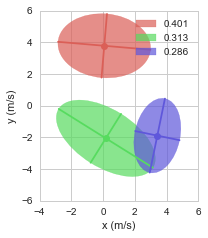

In [58]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [59]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.014      0.041  6.616868e-07      0.044       0.239

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl0LHd9L/ip3lstdWvfWruubbywXS/kJBgfbuIY30Bm
OGRIyHJijjMvAzxIWIKNF8xg32A2++TFHE9wAs6xPbH9/JIBD2TyEmLwg4TF3Dgv2CbEal1JLakX
9abeu2uZP+Rvqbq69q6WuuX6nHOPLXX1r3/VqvrUd/18GUEQBDhw4MDBCYXruDfgwIEDB92EQ3IO
HDg40XBIzoEDBycaDsk5cODgRMMhOQcOHJxoOCTnwIGDEw2H5Bw4cHCi4ZCcAwcOTjQcknPgwMGJ
hkNyDhw4ONFwSM6BAwcnGg7JOXDg4ETDITkHDhycaDgk58CBgxMNh+QcOHBwouGQnAMHDk40HJJz
4MDBiYZDcg4cODjRcEjOgQMHJxoOyTlw4OBEwyE5Bw4cnGg4JOfAgYMTDYfkHDhwcKLhkJwDBw5O
NBySc+DAwYmG57g34OD4IQgCGo0GWJaF2+2G1+uFy+UCwzDHvTUHDjoGIwiCcNybcHB8qNfrKBQK
GBoaQrPZBADs7OxgZGQEQ0NDcLlcDuk56Gs4ltyrGBzHoVqtIp1OIxQKgWVZeL1eCIIAQRDAcRxY
lkWj0QDDMHC73Q7pOeg7OCT3KoQgCGBZFhzHgWEYcByHtbU1cBwHj8cDnudRqVTg9/vh8RxeIkR6
9XodLpcLbrcbbrcbHo/HIT0HPQvHXX2Vged5NJtN0J99d3cX2WwWCwsL8Pl8aDQaSCQSYBgGzWYT
Ho8HAwMDCAaDGBgYgNvtblmP1mEYRiQ7j8fTdpwDB8cFx5J7lYDcT47jAAAsyyIej4PneXi9XgwN
DaHRaCAQCMDr9SISiSAUCqFer6NSqaBQKCCZTIqkR8QnJTOWZSEIAur1OlKpFKampuDz+RzSc3Cs
cEjuVQCe58GyLHieB8MwKBaL2N7exujoKMLhMDY3N1uOZxgGgiCAYRgEAgEEAgGMjo5CEATUajVU
q1Xk83kkEgl4vV6R8KSkVy6X0Wg0RNIj99ax9BwcNRySO+GgOBolExKJBPb39zE/Py9aakYjFgzD
iGQmJb1KpYJ8Po/d3V34fD4MDAxAEASRVIHDOKBDeg6OGg7JnVDwPA+O48DzPACg0Whga2sLPp8P
q6urYkKhk2SBlPToM8nS43keW1tb8Pv9YjwvGAzC5TqoP3dIz8FRwSG5Ewie57G3t4dCoYCFhQXk
cjkkEglMTk5idHS0jdjklhy5q2bhcrnEeN3+/j5mZmbETG02m0WtVoPf729xb7VIr1QqIRwOw+/3
O6TnwDIckjthIPcUOCCOeDyOarWK5eVlBAKBtuO7WfbhcrkQCAQwMDAA4IB8q9UqqtUqMpkM6vU6
AoGAaOkFAoEW0kulUvB4PGBZ1rH0HFiGQ3InBPLat2aziVKphOHhYayurorkofZeoLuEBxyQXigU
QigUAnBIepVKBXt7eyLpkaVHyQ+yLNXcW5/P59ToOVCFQ3InAPLat729PaRSKfh8PkSjUc33KpGD
VXfVLOSkRx0Y1IXBsiwSiQRCoZBo6eklMqj31iE9BwSH5PocZL0BBySxvb0NlmUxPT2N/f19Q2v0
Sj242+3G4OAgBgcHAQCxWAzhcBiNRgOpVArNZrPF0lMivWaziVqtJpIewzDwer2Oe/sqhkNyfQq5
e1oqlRCPxzE8PIyFhQWUy2VD5KVm8dhBfJ2uwTAMBgYGMDw8DODQ0qtUKkgmk2BZViS9gYEB+P3+
NtLb3d0V13AsvVcnHJLrQ0hr3wAgmUwil8shGo1iaGhIPM4qydhBAN0gEbmlx7KsSHqJRAIsy7aU
q/j9fnEvapaeQ3onHw7J9REEQUAmk4HX60UgEECz2UQ8HgfDMFhdXYXX6xWPNXrTHlX8rRvweDwY
GhoSiV1Kevl8HhzHiQkXv9/fkqCQkh7F9Ij4HNI7WXBIrk9ArVm5XE6MU21vb2N8fBzj4+NtN2Wn
5NWPxKdEejs7O+J/OY5rERuQkh7P82ICR0p6Ho8HHo/HIb0+hkNyfQCO40RBSwDI5XJoNBpYXFwU
a9CsgsiwXC6jUCiI3QsnAURQRHzNZrPF0uN5XiS8gYGBFgtOSnrNZhPFYhFTU1MO6fUhHJLrYciT
C7VaDaVSCX6/H6dOndLMGBq15OiYeDyOcDiMfD6PSqUCj8cDjuPaOhP6GV6vF16vF+FwGADQbDZR
qVRQrVaRzWYhCEKLpUekx7IsKpWK6N4yDONYen0Eh+R6FFLlEADIZrNIJpMIBAKIRCK6JRFGSK7Z
bGJrawsAsLKyIv4+lUqJnyvtTCCLR1q60c8gSalIJAJBEFosvWw2CwAIBoOikCgVJwOtlp5Der0N
h+R6ENLaN57nsbOzg1qthuXlZfHm6xRSuaVKpQKv1yu6xAzDwOfzYXR0VNwD3fzyejV56YadsKuM
xcje6Jx9Pl8L6VUqFRSLRdTrdayvrytaeoBDer0Mh+R6CHL3tFKpYGtrC0NDQ2JrllE3VO04QRCQ
TCaRz+cxNzeHwcFBpNNpzTWVOhPIzZOXblBAnz6rUxwXOUhJz+v1IpvNYmpqCpVKBeVyGXt7e3C5
XC0lK2qkBxyUv9DDoVsPBQfKcEiuRyCvfUun09jb28Ps7CwikYilNeUkQ+6py+XCqVOnWuY3SKFH
pG63uy2LWalUWgL6giCgVCqJg2/6+aYWBEHskfX5fBgeHhbHOFYqFZRKJaRSKbjd7hayl1pwPM8j
lUohFAphaGioZSgQdWY46A4ckjtmUGZzd3cXCwsL4DhOlCVfXV0VrSKCGUtOCnJPx8bG2kpOOi03
8Xg8CIfDLQH9ra0t1Go1FAoFsXNBavEcFYy6q2bBMAz8fj/8fj9GRkZaSK9YLIqkJz1vqeCAkqVH
Q4Ec0rMXDskdIyi5QBOwiIhGRkYwOTnZUfM8HUfuaaFQENWAuw2yTsbHx+H3+8XYltTikd78ahZl
r8AIUSqRXr1eR7Vaxf7+PpLJpKiWDBwmNOTubaPRAIC2oUAO6VlHb19dJxhS95Skkba3t8U4mRrM
WF08zyMWi8HtdreoAautKf+vHZDGtuRuHt38WsNxegFWvgvpfAwivc3NTXg8nrahQNJJaERmNHRI
PvPWIT3zcEjuiKGk+xaPxyEIgmacTL6GHkqlEnieRzgcVuyIOC4oWTzS4TjSORFk3XQCu9zVTteg
jGs4HBZnYNB5FwoFJBIJ+Hy+lkSGGunt7u5iZmamZRJar/x9exEOyR0h5FOzCoUCdnZ2MDo6Ks44
1YPexczzvOieMgyDiYkJQ3s7rjYu+XAcmhNRqVTA8zw2NzdV1YOPCt2I65kZCiSdhMYwDKrVqtgF
41h6+nBI7oggrX0TBAE7Ozsol8tYWloSSxSMQMuVpGE1Ho8HKysrePnllw2vKf+5UwsKsEac8jkR
0WhUzN6m02k0Go0Wa6efCpO1yFJrKFAul8Pu7q44FIiy1/Q+wHFvteCQXJeh1Jq1tbWFYDCI1dVV
uN1ucBxnaiyg0rFkFU5MTGBsbExMOpjZZy/eCGrqwVJNOXmNnvQ8jrKg2M51pGQ/NjbWYuEKgoAL
Fy4oDgWSkh7Lsg7pwSG5rkLeWJ/JZJBKpTA9PY2RkRHx92YC/fJjeZ5HIpFAsVhsa9g3s6bdsIsU
5NDSlFNquu8l8u5kL1LSy2azWFlZQb1eR6VS0R0KBCiTXr1ex+Dg4InvyHBIrgsQBAEcx+GFF17A
qVOnAAA7OztoNBpYWVkRxRwJZrOZdGy9Xhdnqeo17BtZky70ftKYk8sryZvuWZZFJpPB0NCQ2Ipl
Fr1GlEAr6QH

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC3CAYAAADpeknXAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlQVFf6979NYyNLI69BASEsglv8aQyimcxiEo1ZLJOR
EAPGMDWlZZaJGbdx1ETUSlAczZiqCWomTs0Yt5Fo/lBnpsyiMdYkFeMyoEHBjUWQVUWaRVqb+/4B
53L7cve+ffu2nE9VV8Hdzmnobz/Pec5zzmNhGIYBhUIxHQG+7gCFQhGGipNCMSlUnBSKSaHipFBM
ChUnhWJSqDgpFJMS6OsOUChmprOzE2vWrEFpaSlsNhtyc3ORkJDAnj969Cg2b96MwMBAZGRk4OWX
X8bdu3fxzjvvoLq6Gk6nE2+++SamTJmCiooKLF++HBaLBcOGDcPq1asRECBhHxkKhSLKF198wSxb
toxhGIb53//+x7zxxhvsOafTyTz11FNMU1MT09HRwbz44otMQ0MDs3//fiY3N5dhGIa5desW8/jj
jzMMwzCvv/4688MPPzAMwzA5OTnMl19+Kdk2dWspFAlOnz6NX/3qVwCAcePG4aeffmLPXblyBfHx
8RgwYABsNhvGjx+PkydP4tlnn8WCBQsAAAzDwGq1AgCKi4sxceJEAMCkSZPw/fffS7Zterf29OnT
vu4CxeSMHz9e8nxh4RG4XBGC52w2G8aMGSN6b0tLC8LCwtjfrVYr7t27h8DAQLS0tMBut7PnQkND
0dLSgtDQUPbe3//+91i4cCGALqFaLBb2WofDIdlv04sTAAre+8arz3c4WmC3h8lfaACXG9vZn5PH
xPc673A43D4Qclw5V8n+nBIZ7FnnVGDU3zRz1ZOy17hcEYiNXyd4rrryHcl7w8LC0Nrayv7e2dmJ
wMBAwXOtra3s/6ampgZvvfUWXnnlFTz//PMA4Da+bG1tRXh4uGTb1K01CZcb21lhJo+JFxSmFrjP
4rZBUUZqaiqOHz8OACgsLMTw4cPZc8nJyaioqEBTUxOcTidOnTqFRx55BI2NjZgzZw6WLl2Kl156
ib3+oYcewokTJwAAx48fR1pammTbfmE573e4ovQW5NlXzlXicmO7oVbUn5k6dSq+++47ZGVlgWEY
rFu3DocOHUJbWxsyMzOxfPlyzJ07FwzDICMjA1FRUcjNzUVzczO2bNmCLVu2AAC2bduGZcuWIScn
B5s2bcLQoUPxzDPPSLZtYRhzr0o5ffr0fevWyrmwQqh1a4Ugrq43BWqkWys35jx9+rSkWyt3v6+g
ltNHGGEtxWDdXANEStEOHXMaDBn36Tmu1Ap3LEoxH1ScBuKptSxuatKzOwCoQM0MdWu9CP8Dr4co
y5xOWLt/Hx0hPHenluQx8WygCKBurlmg4tQZvQQJuIsyeXg0APeAUPHFWva8p0Kl0VzzQcXpAUKu
oF7jSCJMIkohuOf0Eiq1ouaBilMhYmMyvYM6SkQp2I/u669crEVxU5PHAgWoFfU1VJwyaJmL1IKQ
C6sFci+xpHpZUSpQ46HilMCouUit1lKK5OHRulpRf58TvXHnkq+7oBoqTgGMFiWgTJhnHY1IQpDi
53MFCvRtK1qOJwSP6/d1qD90npOHL6ylnDDPOhpx1tHY1T9XG/uzErjP93SelM6JGgu1nN0YNbYE
1LmxRIjDkgYD6JlKOVtWDwAYa49U1KZeVpTr5vqjBfUnqDg5mEmUQG9hciHH1IiUH9EFPBOpv49D
zQ51awFcb/Pes4ubmtgXoNxannU0YljSYEFhcmFF6oGrq9XdpW6ud6GWsxu9MnkEn60iCitlLcUY
ljQYl8rq2XvVuLqAZ5bU3wNFZqbPi/NyYztikpV9mPnoNTcJuFs+MWEWtTVgKPoLniP3EJEqFSgg
nGmkRqRUoN6BurUq4bqpxD3US5hSbmxRWwMA4BJa2J+F0OLmctHq7lIXV3/6tDjVfJD440a9Egbk
3NiitgYUtTVgZNwgjIwbhPiBYexxMfQQqJbpFypQffGJW5uens5uNxgXF4e8vDxfdANA1wdKaotC
b2TvEJQIEwBGxg1yOz4ybhBKqrpE+3DIIKFbNY9DuWiZfiECvVhYhhGe7abS5zFcnB0dHWAYBjt3
7jS6ac3oLUwlQR8xYRKUChTQNg4leJJQfz+MQbWUYyAUFRXhgw8+YD/rN27cwMqVK9Hc3AyXy4UN
GzYgPl48EGm4OEtKStDe3o45c+bg3r17WLx4McaNGyd5j8PRons/rrcBMcmRrNUUsp5lTidi4sJl
N/9Vw2VX17xNbFSY6HMvoev9xg8UvoYcix3QH5U3W3DGUYNhEN9MKzoyGNV1LfhfUx1SrCGa+j04
JhQ1Vc04e+MGACDJZpO8PiY5EjVXGr3yvzOSr7/+Gk6nEwUFBSgsLMT69euxdetWAMDdu3eRl5eH
/fv3Izg4GLNmzcLkyZMRGRmJbdu24eDBgwgO7vly2rhxI55//nlMmzYNP/zwA65evWoucfbv3x9z
587FzJkzUV5ejnnz5uHw4cPsRr1CeGMXN2tHO7toWWxHO2tTk8c73RGItbRarbIW04rAXhazyFkD
AHC5XEgNjmOPj7bbUVLVgKu4I2pBAWCk3Y5LZfUoQ4cmCwoA9lFdf4srF2tR6XJJWlGHwwGr1Yq6
Dv9OUlBajgEAW47hueeeQ3x8PD766CP88Y9/ZK8/c+YMRowYgd/+9reIjY3Fu+++K9m24eJMSkpC
QkICLBYLkpKSEBERgYaGBsTExBjdFd1QEnhRMm9JAj+9jncLc1T0IPxUXYsiZw0etvX8vYiLq6QP
3HEoQa1YyVhU9rruKRYzUNEm3A+5AYuWcgwA8Mwzz6CqqsrtWdXV1QgPD8f27duRn5+Pbdu2sTVV
hDBcnPv378fFixexZs0a1NXVoaWlBYMGiX/j+wtqkgb4SI0vucIEgMTwUFxrvSP6HCnrKdRPvljV
CNXT5WhGcrvz55ru01qOQYiIiAhMnjwZADB58mR8+OGHkm0bPpXy0ksvweFwYNasWVi0aBHWrVsn
6dKaHZJmpxU1whQ6RxALHMlB5lbJi6QOynkDaoJk/jy1oqUcgxjjx4/Ht99+CwA4efIkUlJSJNs2
XBU2mw1//vOfjW7WK2idRwTko7FSwhwVPQgXahsE3duiKnnrKYWaCG/y8GgUX6yVtJ5mcm21oKUc
gxjLli3DypUrsXfvXoSFhcnqwH9Nlo/RkgMLuCcPqBVmJVMOV38XwmAXFShpwxOBAu7jUzlX15/c
W7UEBATgvffeczuWnJzM/jx58mTWVeUTFxeHzz77jP09NjYW//jHP5S3rbKvFA5ahUmyfQSvkRDm
6IHu38pCVpU8WyqDSClKMo2Uurf+7Nr6CipODagZZ5L0Ozk3FlAuzEqmXPA+LnoKlDsWFUMqzc/X
ZSf8FSpOAyDWTA9hJoW4RwOFrCe3XT0ECkh7Cd5IbaRQccoiNJ831h6JS907EEihVBhSwvQUPQUK
eBYEo66tOqg4JdAjyCE3xSEVlQXQa5ypFT3HoGJQ11ZfqDgVIJYNo8R6KkFImEIBIK2QLwi9LKiQ
9aSurf70SXGqca/ErKfW/FQuRc4aUWHqDVegYi8leJJwAVDXVg19dp5TrZt15WKtoHW4VFav6QMr
FGEFeoSpl9XkIutic/JzPZ0nFcLfExKMpk9aTrXobT2NGmeqhRtRlttpQSww5I0Cv3pQ2lwj+DIz
VJwqUDP2VLLChI833FktaM3TVTLuTB4T7xPXNrBzjODLzFBxKkSL9VSyjMtTLtS6t6FXm3pPwVDU
Q8WpE3zrScZsfLGQPFi+qAAg3pIIACi+Wce++JS19d4ZgTzTiC8DLp7MeVLk6XPivNzYrmnOjWyF
KcRYeySbmMA

In [61]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log


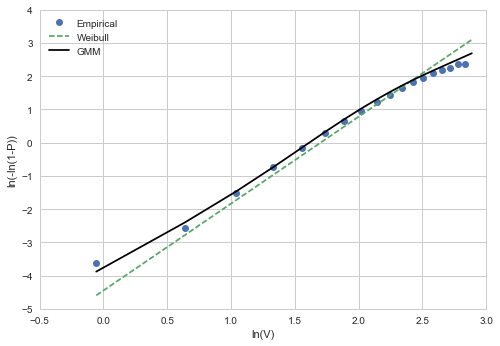

In [62]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Speed Distribution Comparison


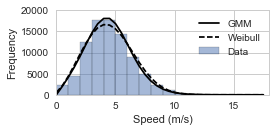

In [63]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

Direction Distribution Comparison


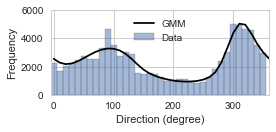

In [64]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print(title)

In [65]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.92579832602


## 6.3 Sectoral Comaprison

In [66]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. Make Plots
        fig = plt.figure(figsize=(10,1.9))
#         fig = plt.figure(figsize=(10,1.7))
        # 3.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 3.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
# #         plt_configure(xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob, 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], x[diff_weibull.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

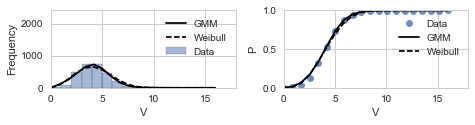

5.0 (-5.0 - 15.0) degree
data size: 2858 weight 0.03278086826862419
GMM Weibull
R square 0.975454606108 0.955633448797
max diff: 0.0414723660134 0.0454936384969 speed value: 2.52293267541 2.52293267541 y gmm 0.167784472381
 


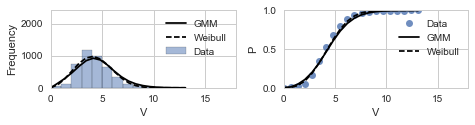

25.0 (15.0 - 35.0) degree
data size: 4304 weight 0.04936629007283363
GMM Weibull
R square 0.900646937714 0.939792271474
max diff: 0.0745111789732 0.0583507663035 speed value: 4.82197411818 4.82197411818 y gmm 0.607644954856
 


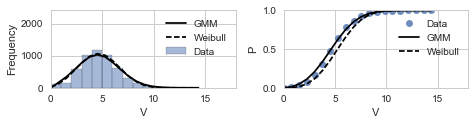

45.0 (35.0 - 55.0) degree
data size: 5222 weight 0.059895624247290245
GMM Weibull
R square 0.96428572263 0.975256151099
max diff: 0.0409085707391 0.131749209524 speed value: 3.02137176776 5.28740059359 y gmm 0.208851887476
 


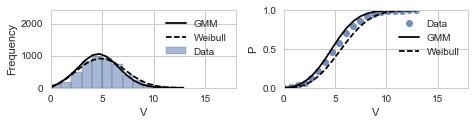

65.0 (55.0 - 75.0) degree
data size: 5109 weight 0.05859952973561966
GMM Weibull
R square 0.968692747915 0.979908975843
max diff: 0.0696063415582 0.116167507114 speed value: 5.42733332486 6.10574999047 y gmm 0.652303542576
 


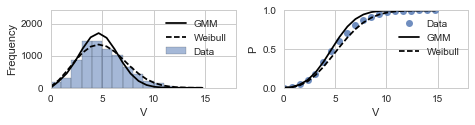

85.0 (75.0 - 95.0) degree
data size: 7989 weight 0.09163273498881688
GMM Weibull
R square 0.938129092783 0.967061918675
max diff: 0.0810150691814 0.0734882687484 speed value: 6.98229093583 5.43067072787 y gmm 0.888500361458
 


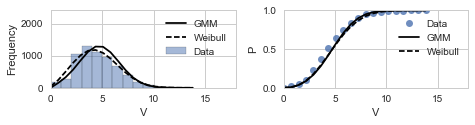

105.0 (95.0 - 115.0) degree
data size: 6317 weight 0.07245512416126627
GMM Weibull
R square 0.892395657311 0.958042224117
max diff: 0.0949698841228 0.0868204891102 speed value: 3.63200041603 4.35840049924 y gmm 0.282107842646
 


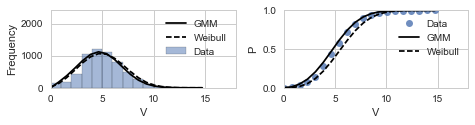

125.0 (115.0 - 135.0) degree
data size: 5915 weight 0.06784423926134082
GMM Weibull
R square 0.957344225798 0.95686405259
max diff: 0.0639875453618 0.107086342479 speed value: 3.09936128931 5.42388225629 y gmm 0.206844688219
 


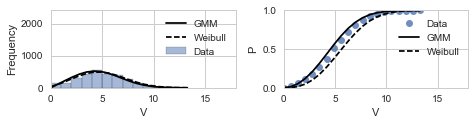

145.0 (135.0 - 155.0) degree
data size: 2973 weight 0.03409990250616505
GMM Weibull
R square 0.934566251462 0.969412287672
max diff: 0.0581684955813 0.137532523369 speed value: 4.19066826778 4.88911297908 y gmm 0.436574146439
 


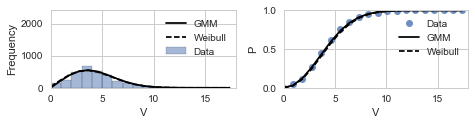

165.0 (155.0 - 175.0) degree
data size: 2991 weight 0.034306360038997535
GMM Weibull
R square 0.96546797358 0.961928853565
max diff: 0.0263033147367 0.0489930027775 speed value: 4.572010406 4.572010406 y gmm 0.593890600342
 


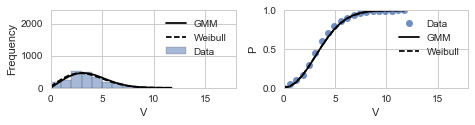

185.0 (175.0 - 195.0) degree
data size: 2175 weight 0.024946951883924987
GMM Weibull
R square 0.927605214042 0.931240677764
max diff: 0.0623064580206 0.0625221362042 speed value: 3.70633719756 3.70633719756 y gmm 0.537233771864
 


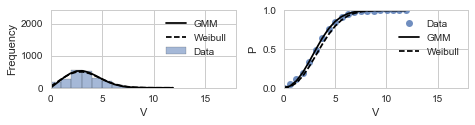

205.0 (195.0 - 215.0) degree
data size: 2166 weight 0.024843723117508747
GMM Weibull
R square 0.966101696177 0.959919728194
max diff: 0.0276615945724 0.0874349573811 speed value: 0.625549490008 3.75329694005 y gmm 0.0221999012725
 


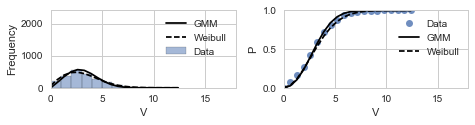

225.0 (215.0 - 235.0) degree
data size: 2128 weight 0.024407868325973504
GMM Weibull
R square 0.954117824163 0.977504060451
max diff: 0.0545776289853 0.053046850816 speed value: 1.30357664063 3.25894160157 y gmm 0.105196807105
 


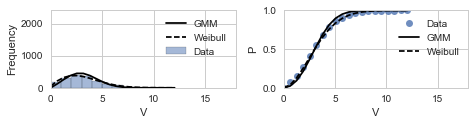

245.0 (235.0 - 255.0) degree
data size: 1711 weight 0.01962493548202099
GMM Weibull
R square 0.938633491617 0.991013345339
max diff: 0.0579377254937 0.0332287944108 speed value: 1.26699401482 0.633497007412 y gmm 0.0928512867799
 


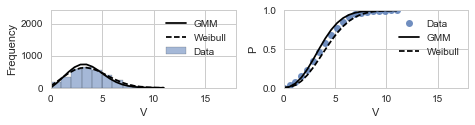

265.0 (255.0 - 275.0) degree
data size: 3089 weight 0.03543040660664105
GMM Weibull
R square 0.946017046852 0.989382815487
max diff: 0.0657340890308 0.0885763558185 speed value: 4.62788979897 4.0494035741 y gmm 0.749774231472
 


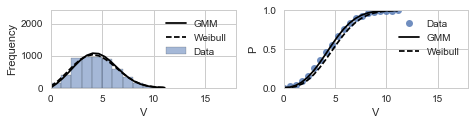

285.0 (275.0 - 295.0) degree
data size: 5395 weight 0.0618799105350691
GMM Weibull
R square 0.971479769017 0.982046514748
max diff: 0.0398878171507 0.0999161726489 speed value: 2.9136240022 3.49634880264 y gmm 0.218499578586
 


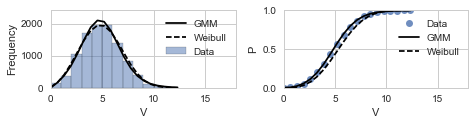

305.0 (295.0 - 315.0) degree
data size: 9983 weight 0.1145036416814819
GMM Weibull
R square 0.994014699368 0.992022971681
max diff: 0.0138961499337 0.091535146298 speed value: 6.48559800475 5.83703820427 y gmm 0.800733773894
 


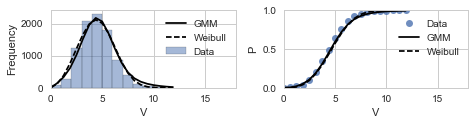

325.0 (315.0 - 335.0) degree
data size: 9280 weight 0.10644032803807994
GMM Weibull
R square 0.970248269361 0.974491477907
max diff: 0.0529248280123 0.0755289816409 speed value: 4.99990143656 4.99990143656 y gmm 0.594704482333
 


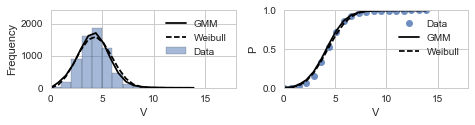

345.0 (335.0 - 355.0) degree
data size: 6506 weight 0.07462292825600735
GMM Weibull
R square 0.977977003531 0.963414259235
max diff: 0.0492783743567 0.0335733851147 speed value: 2.9227038007 2.9227038007 y gmm 0.207901184071
 
Wall time: 1min 2s


In [67]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9558519383694555 0.9699273387714644


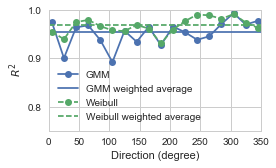

In [68]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.0541758947141046 0.08277616418005337


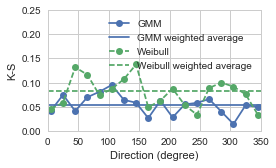

In [69]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

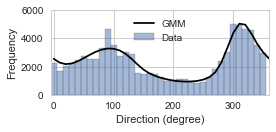

In [70]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [71]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [72]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


105.0 (95.0 - 115.0) Degree Speed Distribution
0.100881498618 4.0 0.350598634356


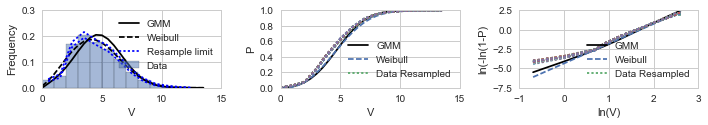

In [73]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [74]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


105.0 (95.0 - 115.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXmYFOW5t++qXmffh2GYlWFTkbjGEMQlKlGIUXMgSgio
MTGanCxyYtRoIodw1COJMRrlivFoFA0iuCSoYBRB1Ji4BZF8YRtgWGemZ5/eu7rq+6Oporqnt5np
melm6r4uL5np6bff6u6qXz3P+z6/R1AURcHAwMDAwMAgLuJIT8DAwMDAwCATMATTwMDAwMAgCQzB
NDAwMDAwSAJDMA0MDAwMDJLAEEwDAwMDA4MkMATTwMDAwMAgCQzBNDAwMDAwSAJDMA0MDAwMDJLA
EEwDAwMDA4MkMATTwMDAwMAgCQzBNDAwMDAwSAJDMA0MDAwMDJLAEEwDAwMDA4MkMATTwMDAwMAg
CQzBNDAwMDAwSAJDMA0MDAwMho2DBw/ywx/+kK9//essWrSIG2+8kd27d/Pwww9z0kkn0dLSov1t
e3s7p5xyCi+++CKHDh1i8uTJPPbYY2Hj3XTTTSxcuHBY5m4IpoGBgYHBsODxeLj55pu5/vrref75
53n66af5z//8T5YuXQpAXV0d69ev1/7+tddeY+zYsdrPNTU1vP7669rPnZ2dNDU1Ddv8zcP2SgYG
BgYGacOtt97KmjVrUjrmvHnzWL58eczHN23axBe+8AVOP/107XfTpk3j6aef5ne/+x2zZ89mw4YN
XHfdddrfX3jhhdrfFhUVUVhYSGNjIw0NDaxfv55LL72Ujz76KKXHEQsjwjQwMDAwGBYOHTpETU2N
9vPNN9/MwoULufTSS2lubqa0tJSsrCwOHjxIU1MTFRUV2Gy2sDHmzJnDq6++CsDGjRu5+OKLh23+
RoRpYGBgMApZvnx53GhwKKioqGD79u3azytWrADg61//OsFgEDguiJIkcfnll/Pee++FjXHxxRez
YMECvva1r1FWVobdbh+2+RsRpoGBgYHBsHDRRRfx/vvvs3XrVu13TU1NNDc3IwgCAF/+8pfZuHEj
H330Eeecc06fMXJycqivr2f58uV85StfGba5gyGYBgYGBgbDRE5ODitWrOCpp57im9/8Jtdccw0/
+9nPuOOOO6isrAQgLy+PiooKTj75ZEQxukRdfvnlfPzxx0yfPn04p4+gKIoyrK9oYGBgYGCQgRgR
poGBgYGBQRIYgmlgYGBgYJAExi5Zg1GJLMtIkoTf78dkMiGKIiaTCZPJpG0+MDAwMNBjCKbBqEKW
ZVpaWigqKtJ+VhQFRVFwuVz09vZSWVmJKIoIgmAIqYGBgYYhmAajAlmWCQaDyLLM0aNHKSwsRJZl
AoEAFotFE0NVQNWaMHVPnCAImoAaQmpgMDoxBNPghEZNveo3gyuKgsPhoKOjA0EQCAaDWK1WRFFE
kiRcLhdWqxWz2RwmhskKqdls1n42MDA4cTA2/RickASDQfx+P36/XxM3SZK0Tgh+v5/6+nrq6+sZ
P3485eXl2Gw2FEWhs7OTAwcO0NjYyIEDB2hubqazsxOXy6WJryqUcFxIJUnC5/NpqV2n04nb7cbj
8eDz+QgGgxhVXAajmWuvvZZt27YBoXPwzDPP5PHHH9ceX7hwIf/+97/7PG/Lli2sXr2aQ4cO8fWv
fz3p15sxY4Y2bmNj4yBnb0SYBicYwWBQS72qoiZJEm1tbXR2dpKfn48oiowdOxaTyaRt+snKykJR
FHw+H1VVVdpYPp8Pv9+Pz+fD6XRqAmyz2bBarVitVu3fiSJSn88HgCiKWgSqpnWNiNRgNDBjxgw+
+ugjpk2bxscff8y5557L22+/zbe//W18Ph+HDx9mypQpfZ533nnnASEv2pHEEEyDE4JoQhkIBGhr
a6Orq4uCggIaGhqwWq309vaGpVRjYTKZyM7OJjs7O+z36u5aVUydTic+nw9BEMIEVP135DqnXkgD
gYAWsarrovp/G0JqMJTU1fX93fz5cO+9A3t8//74r/fFL36RRx99lG9961u8/fbbzJs3j1/96lf0
9vbyr3/9i89//vN8+OGH/OY3v8FkMlFdXc3SpUtZt24de/fu5ZprrqGjo4ObbrqJ9vZ2LrjgAr7/
/e9z++23M3v2bM477zy2bNnCa6+9xn333de/NyMJDME0yGiiCaXf76etrY3u7m4KCwuZMGECFosl
4ViCICSVMjWbzZjN5jAhVUVQFVGv10tPTw9+vx9BEDQR1YupKo761K4kSdq/VSHVC2cwGIwqwgYG
mcDJJ5/M3r17URSFDz/8kMWLFzN9+nT+9re/sXPnTs4991x+/vOf86c//YmSkhIefPBBXnrpJczm
41LldrtZvnw52dnZLFiwgIsuumjY5m8IpkHGoShK2K5XvVA6HA56enooKipi4sSJYSeaSrLC2B8E
QdCENCcnJ2yu6tqm3+/H4/HQ1dWlpYL1Iqr+XxVH/c5dWZYB2LNnD3V1ddrGosjNRvrnGRgkIlFE
ONjHIxFFkSlTprBlyxbKysqwWq2cd955bN68mR07drBgwQJ+/vOf8+Mf/xgAr9fLF7/4RWpra7Ux
pkyZQl5eHgCnnnoq+/btC3uNodwnYAimQcYQSyh9Ph8Oh4Pe3l6Ki4tjCqVKLMEcKiG1WCx9IlxF
UQgEAtrGJLfbrQmp2Wzusz6qCqk6JoQLqT7FHGuN1MAgHZgxYwa///3vmTNnDgBnnnkmjz76KBBq
EF1RUcGjjz5KXl4eGzduJDs7m6NHj2rPb2xsxOVyYbPZ2LZtG1dffTXvv/8+DocDgP/3//7fkM3d
EEyDtEcVyo6ODrq6uqipqdGEsrW1FafTmZRQRjKSkZi63mm1WsN+rwqpfn3U7/cTCAQwm83a+2C3
27XnR0aVeiH1+/3a60UKaeQmJQOD4eCLX/wid911F/fffz8AVquVvLw8TjrpJERR5M477+TGG29E
URRycnK4//77wwSzoKCAW265hY6ODmbPns2ECROYN28eP/vZz1i3bh110RZeU4TRrcQgbVHXBdVy
DKfTSXt7OxUVFTgcDpxOJyUlJZSUlGAymZIed/fu3VRXV2O32zVBAfD5fBw9enRIT7iBoigKfr+f
AwcOUFhYqImqJElYLJY+qV29GUOs8aCvkJrNZmN91MAgBkaEaZB2RAqlfo3S4/Gwf/9+SkpKqKys
7JdQqgxF6nWoUTcOCYJAcXGxdtyqW5EakaobjVQhjVwfVYW0PxGp4WpkYBDCEEyDtCGWULrdbhwO
B263G1EUmThx4qDX5IZrDXOoEUURm82GzWYL+70sy2GlL+r6qOpqFFn6Em3DkCqk+vdETeca9oAG
oxFDMA1GnHhC2draitfrpaysjJKSElpaWgYtlqPh4i6KIna7HbvdHvZ7vQOSz+fD7Xbj8/mQZTlq
6Uu0dc5Ie0D19dS0biAQwG63J0wLGxhkGoZgGowYsYTS5XLR2tqK3++nrKyMmpoaRFHE4/GkJAIc
zl2y6YbqapSVlRX2e1VIIzcbKYoStfQlnhnD/v37qays1FLIhmG9wYmCIZgGw040oQRwOp20trYi
SRJlZWUUFhaGXVhTJWj6cUaDSCZDLCFN5GoUKaYmkynsMzU6vxicSBiCaTBs6E3K4XhqtLe3l9bW
VoLBIOXl5RQUFMS8cA6luBni2ZeBuBrpS1+SiUhjpXaNzi8G6YYhmAZDTjAYpLOzk9zcXOC4MPX0
9OBwOJBlmfLycvLz8+NeGIciwjToP4lcjZqamjCbzXi9Xrq7u5NyNdKPYRjWG6QrhmAaDBmqK08w
GKSpqYlTTjkFgO7ubs2Vo6ysLKFQqgy1YBpCOjhUVyNBECgsLNRMJOK5GplMpqibjeIJaaRhfWT5
iyGkBkOFIZg

### 6.4.3 Adjacent Sector Variability

In [75]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [76]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


105.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXmYHGW5/emq3nt69plMZstOEgzBECEhiTEsAgK5+oiJ
AgkIhkUFRby5gIBc4Io/1guCoKCAQJAAckEkATRkYwsQlsiWZSbLLJnpmZ6e6b27tt8fna9SXV3d
XdVbZvnO8/hIZqb6q66u/k6973ve85okSZJAQUFBQUFBkRHMkT4BCgoKCgqKkQBKmBQUFBQUFDpA
CZOCgoKCgkIHKGFSUFBQUFDoACVMCgoKCgoKHaCESUFBQUFBoQOUMCkoKCgoKHSAEiYFBQUFBYUO
UMKkoKCgoKDQAUqYFBQUFBQUOkAJk4KCgoKCQgcoYVJQUFBQUOgAJUwKCgoKCgodoIRJQUFBQUGh
A5QwKSgoKCgodIASJgUFBQVFydDR0YGf/exnWL58OS644AJceuml2L17N+6//37MnDkTvb298t96
vV585StfwQsvvIDOzk5Mnz4dDz/8cNLrXX755Vi5cmVJzp0SJgUFBQVFSRCJRPDjH/8YF110EZ59
9lk88cQTuOKKK3DLLbcAACZOnIj169fLf79u3TqMHz9e/ndraytee+01+d8+nw/79+8v2fmbS7YS
BQUFBcWwwerVq/Hcc88V9DWXLVuGO++8M+3vN27ciPnz52POnDnyz2bPno0nnngCDzzwAM4880y8
+uqr+OEPfyj//UknnST/bVVVFSorK9HW1oYpU6Zg/fr1OOOMM/DBBx8U9H2kA40wKSgoKChKgs7O
TrS2tsr//vGPf4yVK1fijDPOQE9PD2pra+FwONDR0YH9+/ejoaEBNpst6TXOOussvPLKKwCADRs2
4NRTTy3Z+dMIk4KCgmIM4s4778wYDRYDDQ0N+PTTT+V/P/TQQwCA5cuXQxAEAIcJked5LF26FG+9
9VbSa5x66qk4//zz8d3vfhd1dXWw2+0lO38aYVJQUFBQlASnnHIK3nnnHXz88cfyz/bv34+enh6Y
TCYAwOmnn44NGzbggw8+wLx581Jew+VyYdKkSbjzzjtx9tlnl+zcAUqYFBQUFBQlgsvlwkMPPYS/
/OUvWLFiBX7wgx/gV7/6Fa677jo0NjYCANxuNxoaGnD00UeDYbQpaunSpdi+fTtOPPHEUp4+TJIk
SSVdkYKCgoKCYgSCRpgUFBQUFBQ6QAmTgoKCgoJCB6hKlmJMQhRF8DyPeDwOlmXBMAxYlgXLsrL4
gIKCgkIJSpgUYwqiKKK3txdVVVXyvyVJgiRJCIVCCAQCaGxsBMMwMJlMlEgpKChkUMKkGBMQRRGC
IEAURRw8eBCVlZVJBEj+mxAo6QkjmjiTySQTKCVSCoqxCUqYFKMaJPWqVwyu/jslGeolUrPZLP+b
goJi9ICKfihGJQRBQDweRzwe1yRBLQI1QnCEKIHDRMrzPGKxmJzaDQaDCIfDiEQiiMViEARBN3FT
UIxGXHjhhdixYwcAIB6PY+7cufjTn/4k/37lypX44osvUo7bsmUL1q5di87OTixfvlz3egsXLpRf
t62tLc+zp4RJMcpAiJLjOEiSpEmCmQgzX0IjREpeS02kPp8PbW1tMpHG43FKpBRjBgsXLpSN0rdv
345FixZh8+bNAIBYLIauri7MmDEj5bjFixfj+9//fknPVQuUMClGBfQQJYGSGEuVNlWSaCgUkok0
Go0iGAzKEWkkEkE0GqVESlESTJyY+r/rrsv999mwYMECmTA3b96MZcuWIRAIIBAI4KOPPsIJJ5yA
999/H+eeey5WrFiB6667DhzH4YUXXsBdd90FABgYGMDll1+OZcuW4fe//z0A4Nprr8WWLVsAJKLR
a6+9NtdLkhG0hkkxoiEIgizmUaZJc0EhIsxc1lSmdnmel/+bED9pe1GKjWiNlGIk4uijj0Z7ezsk
ScL777+Pq6++GieeeCLefvtt7Ny5E4sWLcKNN96Ip59+GjU1Nbj33nvxf//3fzCbD1NVOBzGnXfe
CafTifPPPx+nnHJKyc6fEibFiIMkSRBFEf39/YjFYhg3bpzh+uNwj9yURCqKIkRRBJAsNmIYJkVs
lO9DA8XYwr59xf29GgzDYMaMGdiyZQvq6upgtVqxePFibNq0CV9++SXOP/983HjjjbjqqqsAANFo
FAsWLMCECRPk15gxYwbcbjcA4JhjjsHevXuT1ijmd5sSJsWIASFKElGS6NIoilnDLDaUZJiJSEOh
EBwOB+x2uxyRUlAMByxcuBB//OMfcdZZZwEA5s6diwcffBBAYkB0Q0MDHnzwQbjdbmzYsAFOpxMH
Dx6Uj29ra0MoFILNZsOOHTvw/e9/H++88w76+voAAJ9//nnRzp0SJsWwByFK0h6iFtbkiiMRiRWL
lNVE6vV6UVVVlTYiZVlWjkgpKEqJBQsW4IYbbsAdd9wBALBarXC73Zg5cyYYhsH111+PSy+9FJIk
weVy4Y477kgizIqKCvziF7/AwMAAzjzzTEydOhXLli3Dr371K7z88suYqKeYmiPotBKKYQuiMiXi
F/Xm7vP5EAqF0NzcbOh1d+/ejZaWFtjtdsTjcfnnsVgMBw8eLOoXjuM4dHR0YPLkyUVbA0hMtq+q
qoLL5dL8fToiNZvN1IyBgiINaIRJMeygRZRG2kOyYSSkXouNdKld8gChJFLqakRBkQAlTIphA71E
SZAP8Y3UGmaxoUWkymtC0rnKtLjVaqVESjEmQAmT4ohDFEWEw2FYLBZdREmQT4QJJEiT47iS1/JK
QcqFXEN9bYjQShAEtLW1Ydq0aSmKXRqRUoxGUMKkOGIgEWU0GkVbWxtmzJhRsvYQv9+Pzs5OWUhk
tVphsVggCIKswCvGhl9KAin2WlquRgA1rKcYvaCESVFyaKVeSQ3NCIwSpiRJGBwcRDQahSiKaGxs
hNVqlV2CwuEwQqEQBgYGEIvFAAA2mw1WqzXp/1mWNXyuYwm5GNZTIqUYCaCESVEyKL1VgeSNs5ji
HUKUfX19MJvNsNlsGDduHMrKysBxHFiWhcPhgMViweDgIFpaWuRzjcfjiMViiEaj8Pv9iMfjMJlM
sNlsKWQ61nods1kQqpGNSAFomjFQVyOK4QJKmBRFh9pkQL35FUvtSojS4/HAarWisbERZWVl2KfD
noS0WJjNZjidzqTXJGbqJCodHBxEPB6H2WxOiUapICY7MhFpLBaDKIrweDxobm6WRUfUHpDiSIAS
JkXRoHTl0RONGI1YyDFaP1MSZXNzc1I/Yj5OPyaTCRaLBRaLJWVNjuNkIg0GgxgYGADHcbBYLDKB
ms1m3ddjuKPY70H52sSwHkCSwb6y9YX67FIUG5QwKQoOLaLM1h5CyCrXFB+Q2MB9Ph/6+vo0ibKY
IO0VVqs16eeiKMpEGovFEAgEIEkS9uzZoxmNUvedVKjvC61ZpKQeriRSUhOlREpRKFDCpCgYBEFA
X18fKisrASArUSqRS1qWHCOKolyj1EOUpfSSZRhGrncCiWu0d+9eTJ48WY5GY7EYwuEwYrGYrNjV
IlIjKFXrSikISO97yTT5hfyeGtZT5ANKmBR5QxlRdnV1oaKiwrAAJley4nkeu3fvNhRRDgeDAoZh
4HA44HA4kn4uCEISkQaDQcRiMTmCVRNpJsXuaCGBfIlZr2E9wzCIRqNwOBxy7Xm0XEOKwoASJkXO
UBIlQbEVr2RdUqMURRETJkxIEubowXB1+mFZFk6nU1NopFTsDg0NIR6Pg2XZFBJVp4WLhVLWYYux
jhaRdnV1ob6+Hna7nRrWU6SAEiaFYSgnh6iRj+I1Wy+mKIrw+Xzo7++HzWZDY2Mjuru7DZNlMcRH
xYRSaKSMoIn

# 7. Result Variability & Cross-Validation

In [77]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.4 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.407  -0.124   3.776  2.904  2.046  -0.008
2  0.321   3.342  -2.025  1.532  2.638   0.241
3  0.272   0.057  -1.924  3.055  2.016  -0.457

GMM Plot Result
0.406667240721 [[-0.12430202  3.77593684]] [ 2.04540189  2.90448311] -90.6206665609
0.321184364726 [[ 3.34247845 -2.02477846]] [ 1.46579911  2.67522872] 168.556804063
0.272148394553 [[ 0.05707206 -1.9235696 ]] [ 1.68565271  3.24871269] -113.456266419


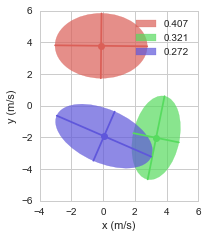

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.958  0.013      0.051  6.350634e-07      0.042       0.234

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.012      0.053  6.674899e-07      0.044       0.240

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.395  0.181   3.780  2.947  1.991  -0.107
2  0.339  0.231  -2.121  3.150  2.597  -0.575
3  0.266  3.449  -1.838  1.454  2.189   0.211

GMM Plot Result
0.394594357053 [[ 0.18071133  3.78042131]] [ 1.97025153  2.96127391] -97.4454209979
0.339106300061 [[ 0.23086446 -2.12060483]] [ 1.83620598  3.64673111] -125.658570073
0.266299342886 [[ 3.44918055 -1.83822116]] [ 1.39786669  2.22458776] 166.691633881


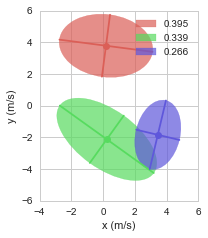

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.012      0.040  6.690140e-07      0.043       0.240

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.014      0.043  6.651560e-07      0.044       0.239

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.408  0.161   3.710  2.922  2.029  -0.095
2  0.326  0.313  -2.233  3.152  2.594  -0.594
3  0.266  3.441  -1.802  1.474  2.134   0.206

GMM Plot Result
0.408242676343 [[ 0.16128641  3.71045848]] [ 2.011656   2.9341718] -97.1783465995
0.326078346833 [[ 0.31309737 -2.23334041]] [ 1.79286271  3.66737406] -125.857392623
0.265678976823 [[ 3.44076833 -1.80249195]] [ 1.41750101  2.17256444] 165.749413834


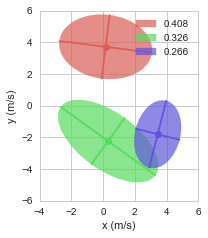

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.953  0.014      0.044  7.140147e-07      0.045       0.248

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.014      0.048  6.676511e-07      0.044       0.240

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.398  -0.000   3.778  2.850  2.021  -0.039
2  0.303   0.133  -1.991  3.143  2.259  -0.514
3  0.299   3.372  -1.916  1.517  2.515   0.225

GMM Plot Result
0.397650071123 [[ -2.43630698e-04   3.77841406e+00]] [ 2.01750748  2.85238636] -93.1327386454
0.30310552045 [[ 0.13305154 -1.99121979]] [ 1.76876775  3.44309706] -118.417686164
0.299244408427 [[ 3.37213319 -1.9161464 ]] [ 1.4577638   2.54946127] 168.447856599


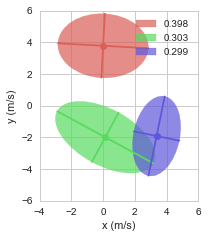

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.955  0.014      0.043  6.854370e-07      0.045       0.243

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.015      0.044  6.662141e-07      0.044       0.240

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.401  0.140   3.767  2.935  2.031  -0.078
2  0.322  0.225  -2.133  3.111  2.512  -0.557
3  0.278  3.411  -1.866  1.470  2.240   0.179

GMM Plot Result
0.400722432492 [[ 0.14049214  3.76706488]] [ 2.01907039  2.94308461] -95.8280486738
0.321547136138 [[ 0.22518572 -2.13260076]] [ 1.82303213  3.55810255] -124.430866139
0.277730431371 [[ 3.41080208 -1.86588812]] [ 1.42980892  2.26576577] 168.795691767


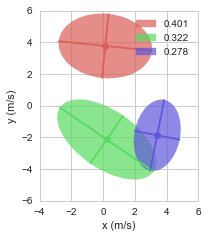

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.013      0.040  6.718027e-07      0.043       0.241

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.013      0.042  6.641729e-07      0.044       0.239

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.412  0.159   3.720  2.956  2.075  -0.084
2  0.319  0.248  -2.252  3.072  2.535  -0.569
3  0.270  3.485  -1.827  1.453  2.163   0.171

GMM Plot Result
0.411552279231 [[ 0.15880979  3.71953466]] [ 2.06081625  2.9664772 ] -96.5432036134
0.318526084158 [[ 0.24755979 -2.25225673]] [ 1.80282982  3.55128147] -125.627217449
0.269921636611 [[ 3.48544045 -1.82660448]] [ 1.41523526  2.18759041] 168.627287062


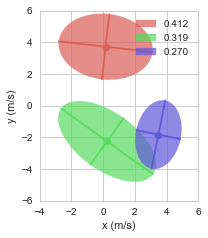

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.955  0.013      0.044  6.756892e-07      0.045       0.241

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.012      0.043  6.664139e-07      0.044       0.240

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.404  0.152   3.760  2.946  2.025  -0.088
2  0.322  0.196  -2.114  3.146  2.529  -0.567
3  0.274  3.422  -1.880  1.482  2.235   0.195

GMM Plot Result
0.403738931281 [[ 0.15237988  3.75969671]] [ 2.01044183  2.95647134] -96.4420108316
0.321870107811 [[ 0.19629047 -2.11377412]] [ 1.81858703  3.60352843] -124.395522207
0.274390960907 [[ 3.42194206 -1.88025741]] [ 1.43326248  2.26632122] 167.631489656


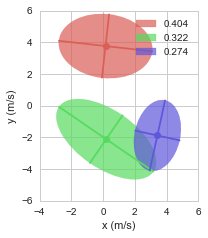

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.952  0.014      0.056  7.253579e-07      0.046       0.250

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.013      0.043  6.631011e-07      0.044       0.239

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.394  0.105   3.790  2.932  2.004  -0.073
2  0.330  0.232  -2.105  3.117  2.474  -0.551
3  0.277  3.450  -1.822  1.461  2.334   0.198

GMM Plot Result
0.393699099499 [[ 0.10534394  3.79004452]] [ 1.99428137  2.93852422] -95.3339631534
0.329511355777 [[ 0.2321363  -2.10474407]] [ 1.81788082  3.53965033] -123.535110641
0.276789544724 [[ 3.44983439 -1.82231938]] [ 1.4145407   2.36262255] 168.898043992


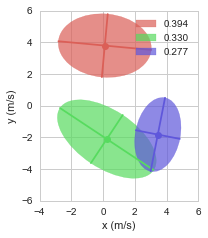

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.954  0.014      0.055  6.986616e-07      0.046       0.246

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.014      0.043  6.646018e-07      0.044       0.239

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.402  -0.122   3.775  2.916  2.041   0.002
2  0.301   3.421  -1.931  1.487  2.602   0.219
3  0.296   0.258  -2.011  3.084  2.143  -0.442

GMM Plot Result
0.402463516959 [[-0.12233435  3.77522165]] [ 2.04126822  2.91612965] -89.8486612173
0.301426575586 [[ 3.42137971 -1.93104524]] [ 1.43506246  2.63103813] 169.787732705
0.296109907455 [[ 0.25774311 -2.01105211]] [ 1.79800865  3.29732189] -114.966659815


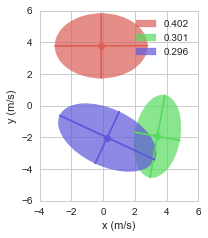

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.955  0.013      0.040  6.738524e-07      0.045       0.241

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.013      0.040  6.656470e-07      0.044       0.240

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.399  0.012   3.767  2.899  2.008  -0.029
2  0.302  0.066  -2.003  3.090  2.324  -0.525
3  0.299  3.443  -1.909  1.496  2.412   0.203

GMM Plot Result
0.398630631251 [[ 0.01154119  3.76707585]] [ 2.00616607  2.90051524] -92.2096712638
0.301918117377 [[ 0.06553652 -2.00284667]] [ 1.78167394  3.43121061] -120.595674941
0.299451251372 [[ 3.44348555 -1.90947812]] [ 1.44697249  2.44202856] 168.850477723


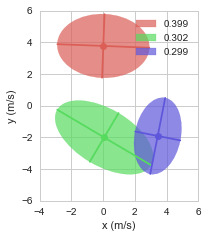

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.955  0.015      0.045  6.760956e-07      0.043       0.241

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.956  0.015      0.044  6.656193e-07      0.044       0.240


Wall time: 16.7 s


In [78]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [79]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 65388.75 21796.25
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.142701  0.072015  0.000004    0.106437     0.583179  0.739843
1    0.145576  0.072183  0.000004    0.107490     0.589149  0.736438
2    0.142208  0.072287  0.000004    0.107242     0.584045  0.738151
3    0.141752  0.071092  0.000004    0.104809     0.581267  0.741200

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.147374  0.073940  0.000004    0.106701     0.588431  0.736816
1    0.140638  0.074282  0.000004    0.104497     0.575694  0.742396
2    0.149754  0.071587  0.000004    0.104961     0.589229  0.738542
3    0.152783  0.074843  0.000004    0.112809     0.599491  0.727645

  
Number of gaussian 2
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.067051  0.032394  0.000001    0.056275     0.312506  0.926073
1    0.065112  0.032071  0.000001    0.056405     0.310315  0.926166
2    0.063937  0.032205  0.000001    0.056341     0.305405  0.928438
3    0.067199  0.032733  0.000001    0.057239     0.313483  0.924642

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.071321  0.032396  0.000001    0.059336     0.314050  0.922640
1    0.073044  0.032894  0.000001    0.058487     0.318607  0.923350
2    0.075031  0.033207  0.000001    0.058777     0.334448  0.915769
3    0.065992  0.034942  0.000001    0.055910     0.308727  0.928038

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.046413  0.012866  6.794272e-07    0.044852     0.242003  0.955047
1    0.044357  0.012744  6.327495e-07    0.042215     0.233542  0.958340
2    0.043922  0.013985  6.788005e-07    0.042917     0.242000  0.955653
3    0.042441  0.013174  6.760002e-07    0.044816     0.241358  0.955192

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.048539  0.012812  7.038946e-07    0.042736     0.246400  0.954326
1    0.053145  0.014543  8.321794e-07    0.050027     0.267912  0.945188
2    0.045518  0.013849  7.013859e-07    0.048771     0.245627  0.952709
3    0.087111  0.013149  7.121221e-07    0.042781     0.247937  0.954044

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.046487  0.010362  5.996087e-07    0.041913     0.227352  0.960205
1    0.039856  0.011467  6.079878e-07    0.041733     0.228960  0.960204
2    0.038203  0.011176  6.090417e-07    0.041225     0.229309  0.959850
3    0.035753  0.010443  5.565161e-07    0.039947     0.218875  0.963337

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.066520  0.015310  5.950410e-07    0.039889     0.226522  0.961736
1    0.042031  0.016114  6.281619e-07    0.042355     0.232665  0.957869
2    0.039921  0.011636  6.208393e-07    0.043840     0.230851  0.959243
3    0.047779  0.014331  7.815005e-07    0.047172     0.260150  0.948595

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036314  0.012164  4.894951e-07    0.037286     0.205352  0.967862
1    0.033566  0.013867  4.983819e-07    0.037635     0.207313  0.967118
2    0.113878  0.015335  3.715548e-07    0.032363     0.178901  0.975380
3    0.048513  0.012520  4.847291e-07    0.037824     0.204555  0.968150

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.041111  0.018992  6.330924e-07    0.043075     0.233879  0.958031
1    0.089784  0.011470  5.657873e-07    0.040682     0.220759  0.962968
2    0.044416  0.015252  4.049722e-07    0.034852     0.187087  0.973845
3    0.058039  0.016779  6.132865e-07    0.040071     0.229500  0.959377

Wall time: 50.9 s


In [80]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.143059  0.071894  3.961697e-06    0.106495     0.584410  0.738908
2    0.065825  0.032351  1.117880e-06    0.056565     0.310427  0.926330
3    0.044283  0.013192  6.667444e-07    0.043700     0.239726  0.956058
4    0.040075  0.010862  5.932886e-07    0.041205     0.226124  0.960899
5    0.058068  0.013472  4.610403e-07    0.036277     0.199030  0.969628

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.147637  0.073663  4.014220e-06    0.107242     0.588211  0.736350
2    0.071347  0.033360  1.181083e-06    0.058128     0.318958  0.922449
3    0.058578  0.013588  7.373955e-07    0.046079     0.251969  0.951567
4    0.049063  0.014348  6.563857e-07    0.043314     0.237547  0.956861
5    0.058337  0.015623  5.542846e-07    0.039670     0.217806  0.963555

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


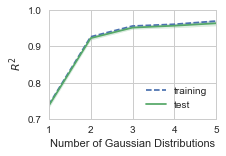

K_S


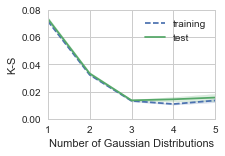

Chi_square


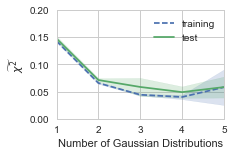

In [81]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

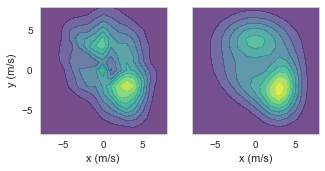

In [82]:
# fig = plt.figure(figsize=(4.3,2.4))
fig = plt.figure(figsize=(5,2.5))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

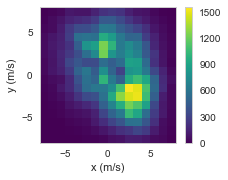

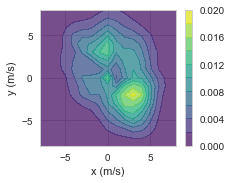

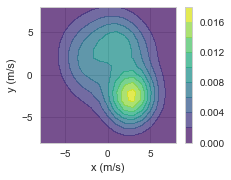

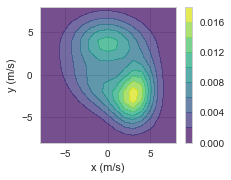

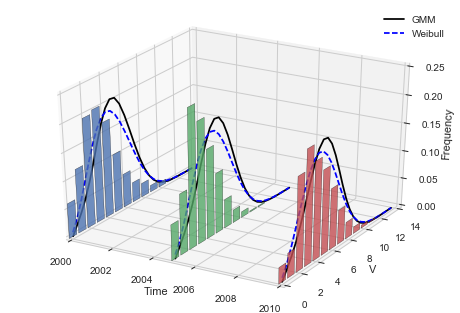

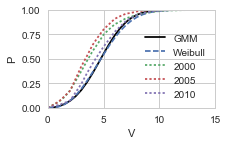

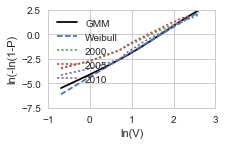

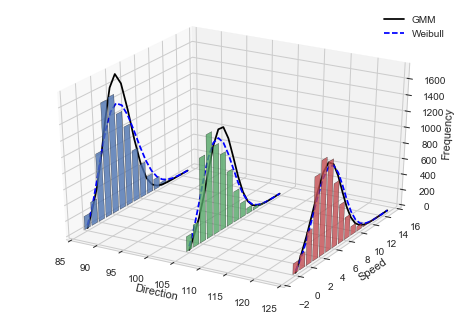

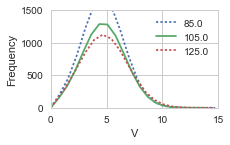

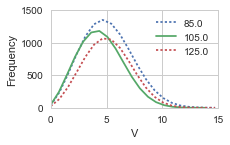

In [83]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [84]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

hongqiao_intl
